# Predicting the Life Expectancy of a Newborn

# Introduction

The notebook is organised into the following sections:
- [Overview](#Overview) 
- [Data Preparation](#Data-Preparation)
- [Data Exploration](#Data-Exploration)
- [Statistical Modeling and Performance Evaluation ](#Statistical-Modeling-and-Performance-Evaluation)
 - [Basic Multivariate Linear Regression using Hold Out Sampling](#Basic-Multivariate-Linear-Regression-using-Hold-Out-Sampling)
 - [Polynomial Regression using Hold Out Sampling](#Polynomial-Regression-using-Hold-Out-Sampling])
 - [Linear Ridge Regression (L2 Regularisation) using Hold Out Sampling](#Linear-Ridge-Regression-(L2-Regularisation)-using-Hold-Out-Sampling)   
 - [Polynomial Ridge Regression (L2 Regularisation) using k-Fold Cross Validation](#Polynomial-Ridge-Regression-(L2-Regularisation)-using-k-Fold-Cross-Validation) 
  - [Polynomial Ridge Regression (L2 Regularisation) using k-Fold Cross Validation (lambda=0.01)](#Polynomial-Ridge-Regression-(L2-Regularisation)-using-k-Fold-Cross-Validation-(lambda=0.01)) 
 - [Polynomial Lasso Regression (L1 Regularisation) using k-Fold Cross Validation](#Polynomial-Lasso-Regression-(L1-Regularisation)-using-k-Fold-Cross-Validation)   
 - [Polynomial Lasso Regression (L1 Regularisation) using k-Fold Cross Validation (lambda=0.00025)](#Polynomial-Lasso-Regression-(L1-Regularisation)-using-k-Fold-Cross-Validation-(lambda=0.00025))
- [Final Selected Approach](#Final-Selected-Approach)
 - [Prediction on Unseen Data](#Prediction-on-Unseen-Data)
- [References](#References)

# Overview<a id="Overview"></a>

## Project Objective
The objective of this assignment is to use a regression approach to predict the life expectancy of a newborn based on several attributes related to the region in which he/she was born. The "best" model must be used to predict the life expectancy of a newborn on unseen test data (``test.csv``) [[1]](#References).

## Target Feature

The target feature is ``TARGET_LifeExpectancy``, which is a continuous numerical feature. Citing that the project is on a regression problem.

## Descriptive Features

The ``metadata.txt`` file contains a brief description of each of the variables. The assignment requires that all features are used as inputs to the model. No feature selection can be undertaken [[1]](#References).

## Data Source

The original data has been sourced from "Global Health Observatory data repository". The ``train.csv`` and ``test.csv`` files have been modified slightly by RMIT. The dependent (target) variable ``TARGET_LifeExpectancy`` has been removed from the test set [[1]](#References).

# Data Preparation<a id="Data-Preparation"></a>

## Loading Modules and Data

First, import all the modules required for the project.

In [1]:
# Load modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score
#import sklearn.metrics

# Suppress any warnings
import warnings
warnings.filterwarnings("ignore")

Load the data from the s3 bucket.

In [2]:
# Load data
life_exp_train = pd.read_csv('train.csv', delimiter=',')
life_exp_test = pd.read_csv('test.csv', delimiter=',')

In [3]:
# Check the first five records of the training set
life_exp_train.head(n=5)

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263,262,264,62,0.01,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271,278,264,64,0.01,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268,246,290,66,0.01,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272,248,296,69,0.01,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275,278,272,71,0.01,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


In [4]:
# Check the first five records of the test set
life_exp_test.head(n=5)

,ID,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,120,2017,0,335,314,356,66,6.35,0.000000,...,7.0,3.84,64,1.9,4139.29,2785935.0,8.3,8.2,0.531,3.376389
1,2,120,2016,0,348,338,358,67,8.33,23.965612,...,68.0,3.31,64,2.0,536.83,2692466.0,8.5,8.3,0.527,3.376389
2,3,120,2015,0,355,362,348,69,8.10,35.958573,...,67.0,4.26,77,2.3,542.77,2599834.0,8.6,8.5,0.523,3.376389
3,4,120,2014,0,358,348,368,72,8.24,256.122524,...,75.0,3.30,75,2.6,5150.04,259615.0,8.8,8.6,0.508,3.209361
4,5,120,2013,0,361,368,354,75,8.06,239.891392,...,73.0,3.38,71,2.5,4815.02,24218565.0,8.9,8.8,0.495,3.065942


In [5]:
# What are the total number of rows and columns for each set
print(f"The train data contains {life_exp_train.shape[0]} rows and {life_exp_train.shape[1]} columns")
print(f"The test data contains {life_exp_test.shape[0]} rows and {life_exp_test.shape[1]} columns")

The train data contains 2071 rows and 24 columns
The test data contains 867 rows and 23 columns


In [6]:
# What are the features (column names)
print(f"The data contains the following variables:")
life_exp_train.columns.values

The data contains the following variables:


array(['ID', 'TARGET_LifeExpectancy', 'Country', 'Year', 'Status',
       'AdultMortality', 'AdultMortality-Male', 'AdultMortality-Female',
       'InfantDeaths', 'Alcohol', 'PercentageExpenditure', 'Measles',
       'BMI', 'UnderFiveDeaths', 'Polio', 'TotalExpenditure',
       'Diphtheria', 'HIV-AIDS', 'GDP', 'Population', 'Thinness1-19years',
       'Thinness5-9years', 'IncomeCompositionOfResources', 'Schooling'],
      dtype=object)

## Data Types

In [7]:
print(f"The data types for each variable are below (Note: 'object' means a string type):")
print(life_exp_train.dtypes)

The data types for each variable are below (Note: 'object' means a string type):
ID                                int64
TARGET_LifeExpectancy           float64
Country                           int64
Year                              int64
Status                            int64
AdultMortality                    int64
AdultMortality-Male               int64
AdultMortality-Female             int64
InfantDeaths                      int64
Alcohol                         float64
PercentageExpenditure           float64
Measles                           int64
BMI                             float64
UnderFiveDeaths                   int64
Polio                             int64
TotalExpenditure                float64
Diphtheria                      float64
HIV-AIDS                        float64
GDP                             float64
Population                        int64
Thinness1-19years               float64
Thinness5-9years                float64
IncomeCompositionOfResources    float64

Most descriptive features are all continuous. However, the country variable is a discrete nominal encoded as integer values. If left untreated, this will cause errors in a model as integer encoding inherently assumes an ordering. Country “2” is not twice as much as Country “1”. Therefore, I need use one-hot encoding [[2]](#References). Unfortunately, this will introduce the curse of dimensionality (too many features).

## Remove ID-like Variables

Remove any ID-like variables from the data as these are not required for the machine learning models.

In [8]:
# Train data - remove IDs (in place)
life_exp_train.drop('ID', axis=1, inplace=True)
# Check
life_exp_train.head()

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,67.1,146,2017,0,263,262,264,62,0.01,71.279624,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,59.8,146,2016,0,271,278,264,64,0.01,73.523582,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,57.6,146,2015,0,268,246,290,66,0.01,73.219243,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,55.5,146,2014,0,272,248,296,69,0.01,78.184215,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,57.7,146,2013,0,275,278,272,71,0.01,7.097109,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


In [9]:
# Test data - remove IDs (in place)
life_exp_test.drop('ID', axis=1, inplace=True)
# Check
life_exp_test.head()

,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,PercentageExpenditure,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,120,2017,0,335,314,356,66,6.35,0.000000,118,...,7.0,3.84,64,1.9,4139.29,2785935.0,8.3,8.2,0.531,3.376389
1,120,2016,0,348,338,358,67,8.33,23.965612,11699,...,68.0,3.31,64,2.0,536.83,2692466.0,8.5,8.3,0.527,3.376389
2,120,2015,0,355,362,348,69,8.10,35.958573,8523,...,67.0,4.26,77,2.3,542.77,2599834.0,8.6,8.5,0.523,3.376389
3,120,2014,0,358,348,368,72,8.24,256.122524,4458,...,75.0,3.30,75,2.6,5150.04,259615.0,8.8,8.6,0.508,3.209361
4,120,2013,0,361,368,354,75,8.06,239.891392,1449,...,73.0,3.38,71,2.5,4815.02,24218565.0,8.9,8.8,0.495,3.065942


## Fixing Variable Names
Minus signs in the variable names can be problematic when modelling. In regression models a minus sign in the variable name may exclude the variable. The variable names need to be modified so that the minus signs are replaced with an underscore [[3]](#References).

In [10]:
# Train data
life_exp_train.columns = [colname.replace('-', '_') for colname in list(life_exp_train.columns)]
# Check
life_exp_train.head()

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality_Male,AdultMortality_Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness1_19years,Thinness5_9years,IncomeCompositionOfResources,Schooling
0,67.1,146,2017,0,263,262,264,62,0.01,71.279624,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,59.8,146,2016,0,271,278,264,64,0.01,73.523582,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,57.6,146,2015,0,268,246,290,66,0.01,73.219243,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,55.5,146,2014,0,272,248,296,69,0.01,78.184215,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,57.7,146,2013,0,275,278,272,71,0.01,7.097109,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


In [11]:
# What are the features (column names)
print(f"The data contains the following variables:")
life_exp_train.columns.values

The data contains the following variables:


array(['TARGET_LifeExpectancy', 'Country', 'Year', 'Status',
       'AdultMortality', 'AdultMortality_Male', 'AdultMortality_Female',
       'InfantDeaths', 'Alcohol', 'PercentageExpenditure', 'Measles',
       'BMI', 'UnderFiveDeaths', 'Polio', 'TotalExpenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness1_19years',
       'Thinness5_9years', 'IncomeCompositionOfResources', 'Schooling'],
      dtype=object)

In [12]:
# Test data
life_exp_test.columns = [colname.replace('-', '_') for colname in list(life_exp_test.columns)]
# Check
life_exp_test.head()

,Country,Year,Status,AdultMortality,AdultMortality_Male,AdultMortality_Female,InfantDeaths,Alcohol,PercentageExpenditure,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness1_19years,Thinness5_9years,IncomeCompositionOfResources,Schooling
0,120,2017,0,335,314,356,66,6.35,0.000000,118,...,7.0,3.84,64,1.9,4139.29,2785935.0,8.3,8.2,0.531,3.376389
1,120,2016,0,348,338,358,67,8.33,23.965612,11699,...,68.0,3.31,64,2.0,536.83,2692466.0,8.5,8.3,0.527,3.376389
2,120,2015,0,355,362,348,69,8.10,35.958573,8523,...,67.0,4.26,77,2.3,542.77,2599834.0,8.6,8.5,0.523,3.376389
3,120,2014,0,358,348,368,72,8.24,256.122524,4458,...,75.0,3.30,75,2.6,5150.04,259615.0,8.8,8.6,0.508,3.209361
4,120,2013,0,361,368,354,75,8.06,239.891392,1449,...,73.0,3.38,71,2.5,4815.02,24218565.0,8.9,8.8,0.495,3.065942


## Independence of Observations
I noticed in the training data that the records where sorted by country (ordered data). To ensure independence I will need to shuffle the data before using it for modelling [[4]](#References).

In [13]:
# Shuffle the data frame in-place and reset the index
life_exp_train = life_exp_train.sample(frac=1).reset_index(drop=True)
life_exp_test = life_exp_test.sample(frac=1).reset_index(drop=True)
# Check
life_exp_train.head()
#life_exp_test.head()

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality_Male,AdultMortality_Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness1_19years,Thinness5_9years,IncomeCompositionOfResources,Schooling
0,62.6,71,2009,0,288,278,298,8,7.44,499.730412,...,94,3.19,93.0,0.1,7583.98,15484192,2.4,2.5,0.754,3.834058
1,56.1,84,2007,0,327,330,324,32,0.21,1.099666,...,59,2.82,59.0,2.7,37.44,9679745,9.3,9.3,0.346,2.569047
2,41.2,102,2009,0,495,514,476,17,1.50,60.048848,...,46,4.40,48.0,9.0,444.81,42758,9.4,9.4,0.330,2.489980
3,72.3,55,2002,1,218,222,214,0,7.13,291.017077,...,96,6.00,96.0,0.1,3755.06,236755,2.8,2.8,0.716,3.701351
4,74.2,44,2010,0,161,170,152,6,6.12,49.092420,...,86,4.20,82.0,1.4,572.74,963652,3.4,3.3,0.692,3.577709


### Target Feature
Checking the distribution of the target feature ``TARGET_LifeExpectancy``.

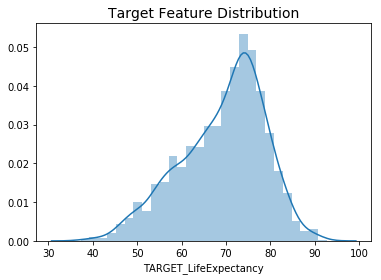

In [14]:
import seaborn as sns
sns.distplot(a=life_exp_train['TARGET_LifeExpectancy'])
plt.title('Target Feature Distribution', size=14)
plt.show()

Now the data is 'as clean' as possible and ready for exploration.

# Data Exploration<a id="Data-Exploration"></a>

## Summary Statistics

The summary statistics for the train data are as follows:

In [15]:
life_exp_train.describe(include='all')

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality_Male,AdultMortality_Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness1_19years,Thinness5_9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,...,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,69.274505,95.360212,2009.518590,0.185418,162.833897,161.908257,163.759536,33.079672,4.696379,764.540216,...,82.727185,5.883858,82.753259,1.632883,7352.742342,1.203741e+07,4.941284,4.977306,0.609551,3.372453
std,9.482281,54.861641,4.614147,0.388730,118.872170,119.442235,118.800292,135.832868,4.205888,2081.880374,...,23.188837,2.554965,23.130969,4.782325,15219.978663,6.391797e+07,4.697830,4.785532,0.216532,0.590832
min,37.300000,0.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.000000,50.000000,2006.000000,0.000000,74.000000,74.000000,74.000000,0.000000,0.615000,5.848550,...,77.000000,4.190000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,71.200000,94.000000,2010.000000,0.000000,144.000000,142.000000,144.000000,3.000000,3.830000,69.020425,...,93.000000,5.640000,93.000000,0.100000,1410.670000,6.522310e+05,3.200000,3.300000,0.655000,3.449638
75%,76.000000,144.000000,2014.000000,0.000000,228.000000,228.000000,230.000000,22.000000,7.840000,430.190047,...,97.000000,7.430000,97.000000,0.800000,5811.295000,5.371104e+06,7.400000,7.400000,0.769500,3.741657
max,92.700000,192.000000,2017.000000,1.000000,699.000000,704.000000,722.000000,1800.000000,17.870000,19479.911610,...,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


### Scatterplots
The linearity assumption can be evaluated using scatterplots which can visualise whether there is a linear or curvilinear relationship between the target variable and the independent variables [[5]](#References)[[6]](#References)[[7]](#References).

Plot a linear regression model over each pair of features.

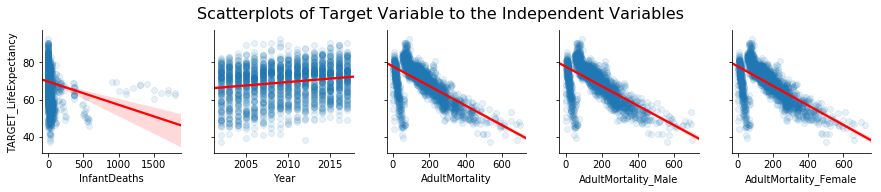

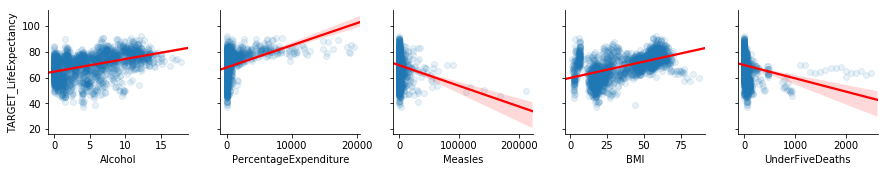

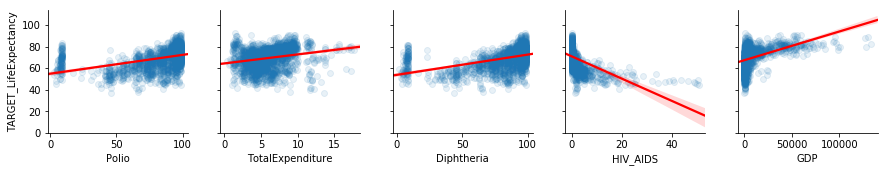

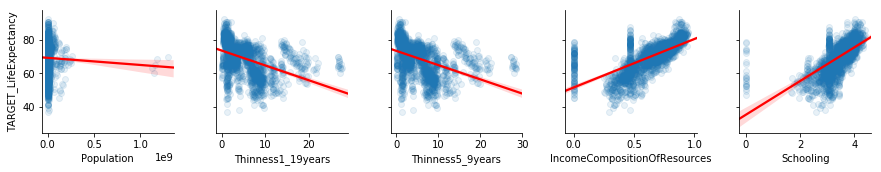

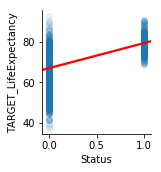

In [16]:
# Using seaborn, create the default pair plots
# Only display the target variable in the Y
# Fit linear regression model to the plots
# Broken down into sections for ease of readability

sns.pairplot(life_exp_train, y_vars = ["TARGET_LifeExpectancy"], 
             x_vars = ["InfantDeaths", "Year", "AdultMortality", "AdultMortality_Male", "AdultMortality_Female"], 
             kind = "reg", plot_kws = {'line_kws': {'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
# Title 
plt.suptitle('Scatterplots of Target Variable to the Independent Variables \n\n', y=1.05, size = 16);

sns.pairplot(life_exp_train, y_vars = ["TARGET_LifeExpectancy"], 
             x_vars = [ "Alcohol", "PercentageExpenditure", "Measles", "BMI", "UnderFiveDeaths"], 
             kind = "reg", plot_kws = {'line_kws': {'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

sns.pairplot(life_exp_train, y_vars = ["TARGET_LifeExpectancy"], 
             x_vars = ["Polio", "TotalExpenditure", "Diphtheria", "HIV_AIDS", "GDP"], 
             kind = "reg", plot_kws = {'line_kws': {'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

sns.pairplot(life_exp_train, y_vars = ["TARGET_LifeExpectancy"], 
             x_vars = ["Population", "Thinness1_19years", "Thinness5_9years", "IncomeCompositionOfResources", "Schooling"], 
             kind = "reg", plot_kws = {'line_kws': {'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

sns.pairplot(life_exp_train, y_vars = ["TARGET_LifeExpectancy"], 
             x_vars = ["Status"], 
             kind = "reg", plot_kws = {'line_kws': {'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

Lets try to fit a higher order polynomial regresssion as I am not convinced all the variables have a linear relationship with the target variable.

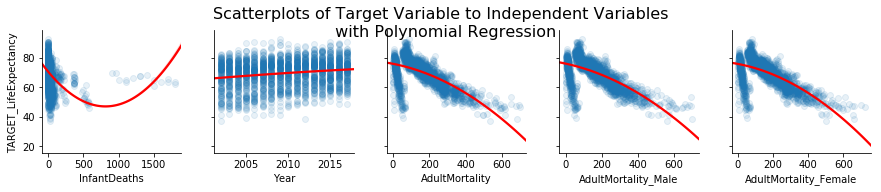

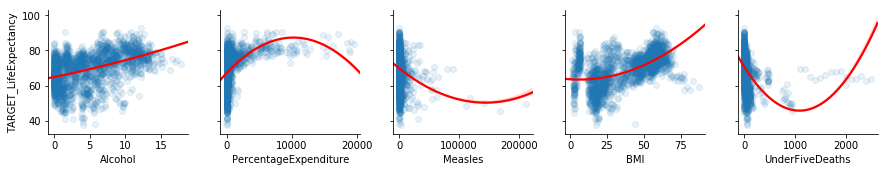

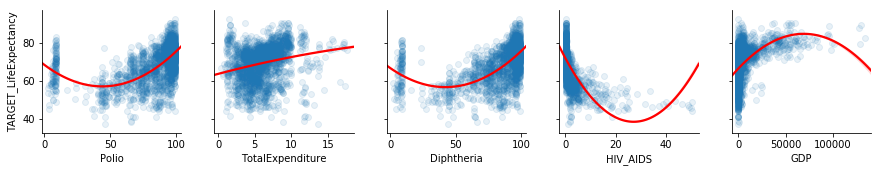

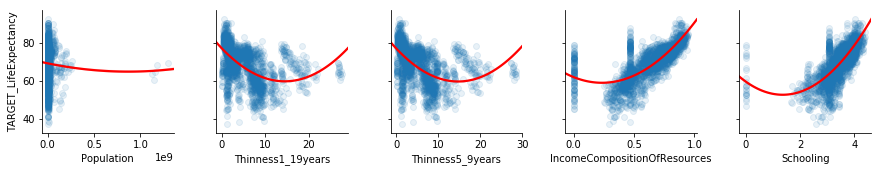

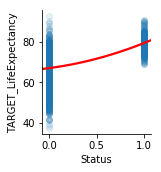

In [17]:
# Using seaborn, create the default pair plots
# Only display the target variable in the Y
# Fit polnomial regression model to the plots
# Broken down into sections for ease of readability

g = sns.PairGrid(life_exp_train, 
                 y_vars = ["TARGET_LifeExpectancy"], 
                 x_vars = ["InfantDeaths", "Year", "AdultMortality", "AdultMortality_Male", "AdultMortality_Female"])
g.map(sns.regplot, order = 2, ci = 25, scatter_kws = {'alpha': 0.1}, line_kws = {'color':'red'})

# Title 
plt.suptitle('Scatterplots of Target Variable to Independent Variables \n with Polynomial Regression\n', y=1.05, size = 16);

# save to a file
g.savefig("a1_pairplot_ply_0.png")
                
g1 = sns.PairGrid(life_exp_train, 
                 y_vars = ["TARGET_LifeExpectancy"], 
                 x_vars = ["Alcohol", "PercentageExpenditure", "Measles", "BMI", "UnderFiveDeaths"])
g1.map(sns.regplot, order = 2, ci = 25, scatter_kws = {'alpha': 0.1}, line_kws = {'color':'red'})

# save to a file
g1.savefig("a1_pairplot_ply_1.png")


g2 = sns.PairGrid(life_exp_train, 
                 y_vars = ["TARGET_LifeExpectancy"], 
                 x_vars =["Polio", "TotalExpenditure", "Diphtheria", "HIV_AIDS", "GDP"])
g2.map(sns.regplot, order = 2, ci = 25, scatter_kws = {'alpha': 0.1}, line_kws = {'color':'red'})

# save to a file
g2.savefig("a1_pairplot_ply_2.png")

g3 = sns.PairGrid(life_exp_train, 
                 y_vars = ["TARGET_LifeExpectancy"], 
                 x_vars = ["Population", "Thinness1_19years", "Thinness5_9years", "IncomeCompositionOfResources", "Schooling"])
g3.map(sns.regplot, order = 2, ci = 25, scatter_kws = {'alpha': 0.1}, line_kws = {'color':'red'})

# save to a file
g3.savefig("a1_pairplot_ply_3.png")

g4 = sns.PairGrid(life_exp_train, 
                 y_vars = ["TARGET_LifeExpectancy"], 
                 x_vars = ["Status"])
g4.map(sns.regplot, order = 2, ci = 25, scatter_kws = {'alpha': 0.1}, line_kws = {'color':'red'})

# save to a file
g4.savefig('a1_pairplot_ply_3.png')

## Correlations
Are there any pairs of features that are correlated? The no multicollinearity assumption can be evaluated using a correlation matrix, where the bivariate correlation coefficients should be less than 0.8 [[2]](#References)[[7]](#References).

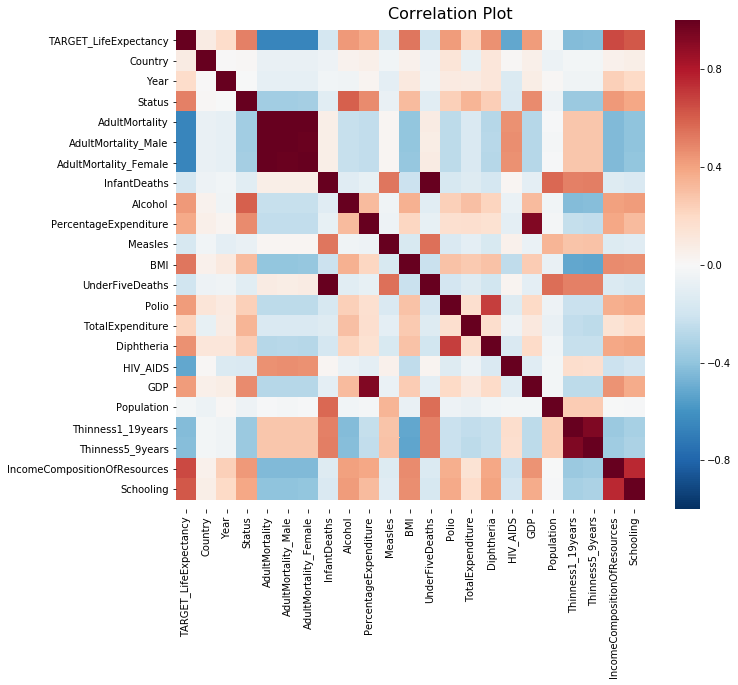

In [88]:
# Correlation Plot (using seaborn)
correlations = life_exp_train.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

sns.heatmap(correlations, cmap="RdBu_r", center=0, vmin=-1, vmax=1, square=True)

# Fix the limits (top/bottom) of the seaborn plot
b, t = plt.ylim()
b += 0.5
t-= 0.5
plt.ylim(b, t)

# Title 
plt.suptitle('Correlation Plot', y=0.9, size = 16);

# save to a file
plt.savefig('a1_correlation_matrix', bbox_inches = 'tight', pad_inches = 0.2)

# then display on screen
plt.show()

In [19]:
# Display the correlation coefficients 
life_exp_train.corr()

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality_Male,AdultMortality_Female,InfantDeaths,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness1_19years,Thinness5_9years,IncomeCompositionOfResources,Schooling
TARGET_LifeExpectancy,1.000000,0.080722,0.181780,0.504971,-0.663425,-0.662934,-0.661136,-0.179600,0.433071,0.378189,...,0.426012,0.225359,0.457555,-0.522120,0.427650,-0.028657,-0.436399,-0.428562,0.659903,0.624773
Country,0.080722,1.000000,0.000582,0.011727,-0.077161,-0.077147,-0.076852,-0.051968,0.042809,0.054864,...,0.130150,-0.080401,0.117626,0.010548,0.060588,-0.058246,-0.026566,-0.026096,0.053235,0.063884
Year,0.181780,0.000582,1.000000,-0.001923,-0.089279,-0.088935,-0.089250,-0.035658,-0.045756,0.023588,...,0.087700,0.082005,0.117759,-0.145676,0.072161,0.013858,-0.043116,-0.046780,0.234427,0.200168
Status,0.504971,0.011727,-0.001923,1.000000,-0.345010,-0.345065,-0.343508,-0.110252,0.594338,0.470470,...,0.236705,0.336887,0.242776,-0.152962,0.470674,-0.048880,-0.370496,-0.373090,0.433452,0.385327
AdultMortality,-0.663425,-0.077161,-0.089279,-0.345010,1.000000,0.997920,0.997898,0.066169,-0.231353,-0.244415,...,-0.260753,-0.155247,-0.282204,0.458688,-0.283542,-0.015194,0.274726,0.276863,-0.444295,-0.399052
AdultMortality_Male,-0.662934,-0.077147,-0.088935,-0.345065,0.997920,1.000000,0.991644,0.063191,-0.230707,-0.244479,...,-0.259005,-0.155081,-0.279934,0.461346,-0.283388,-0.016477,0.273562,0.275210,-0.444545,-0.400479
AdultMortality_Female,-0.661136,-0.076852,-0.089250,-0.343508,0.997898,0.991644,1.000000,0.068885,-0.231033,-0.243325,...,-0.261416,-0.154764,-0.283304,0.454091,-0.282508,-0.013839,0.274745,0.277364,-0.442181,-0.395944
InfantDeaths,-0.179600,-0.051968,-0.035658,-0.110252,0.066169,0.063191,0.068885,1.000000,-0.118974,-0.081025,...,-0.171606,-0.126157,-0.175752,0.016835,-0.098339,0.570728,0.501310,0.510235,-0.131550,-0.152351
Alcohol,0.433071,0.042809,-0.045756,0.594338,-0.231353,-0.230707,-0.231033,-0.118974,1.000000,0.318913,...,0.237705,0.301430,0.221143,-0.069050,0.318535,-0.037309,-0.435332,-0.428768,0.406620,0.426681
PercentageExpenditure,0.378189,0.054864,0.023588,0.470470,-0.244415,-0.244479,-0.243325,-0.081025,0.318913,1.000000,...,0.159978,0.166338,0.154711,-0.096885,0.922500,-0.022790,-0.240244,-0.243702,0.385912,0.319845


## Histograms

Examine the distribution of each variable in the data using histogram plots.

<Figure size 432x288 with 0 Axes>

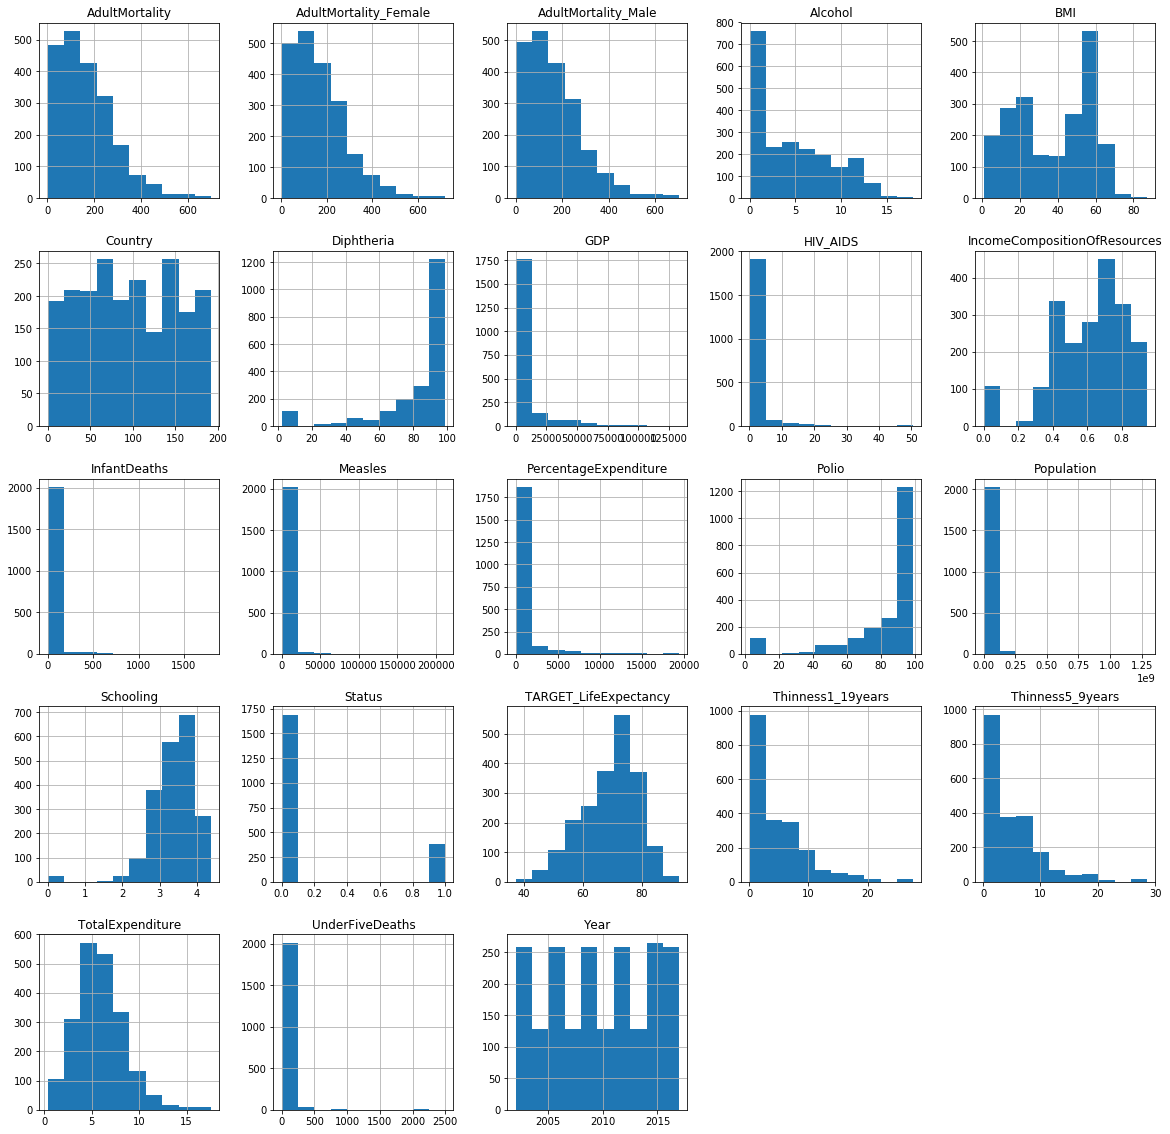

In [20]:
# Plot a histogram of each variable
plt.figure()
life_exp_train.hist(figsize=(20,20))
# save to a file
plt.savefig('a1_histograms.png')
plt.show()

### Boxplots

Explore a visual summary of the distribution of each variable, taking note of any outliers.

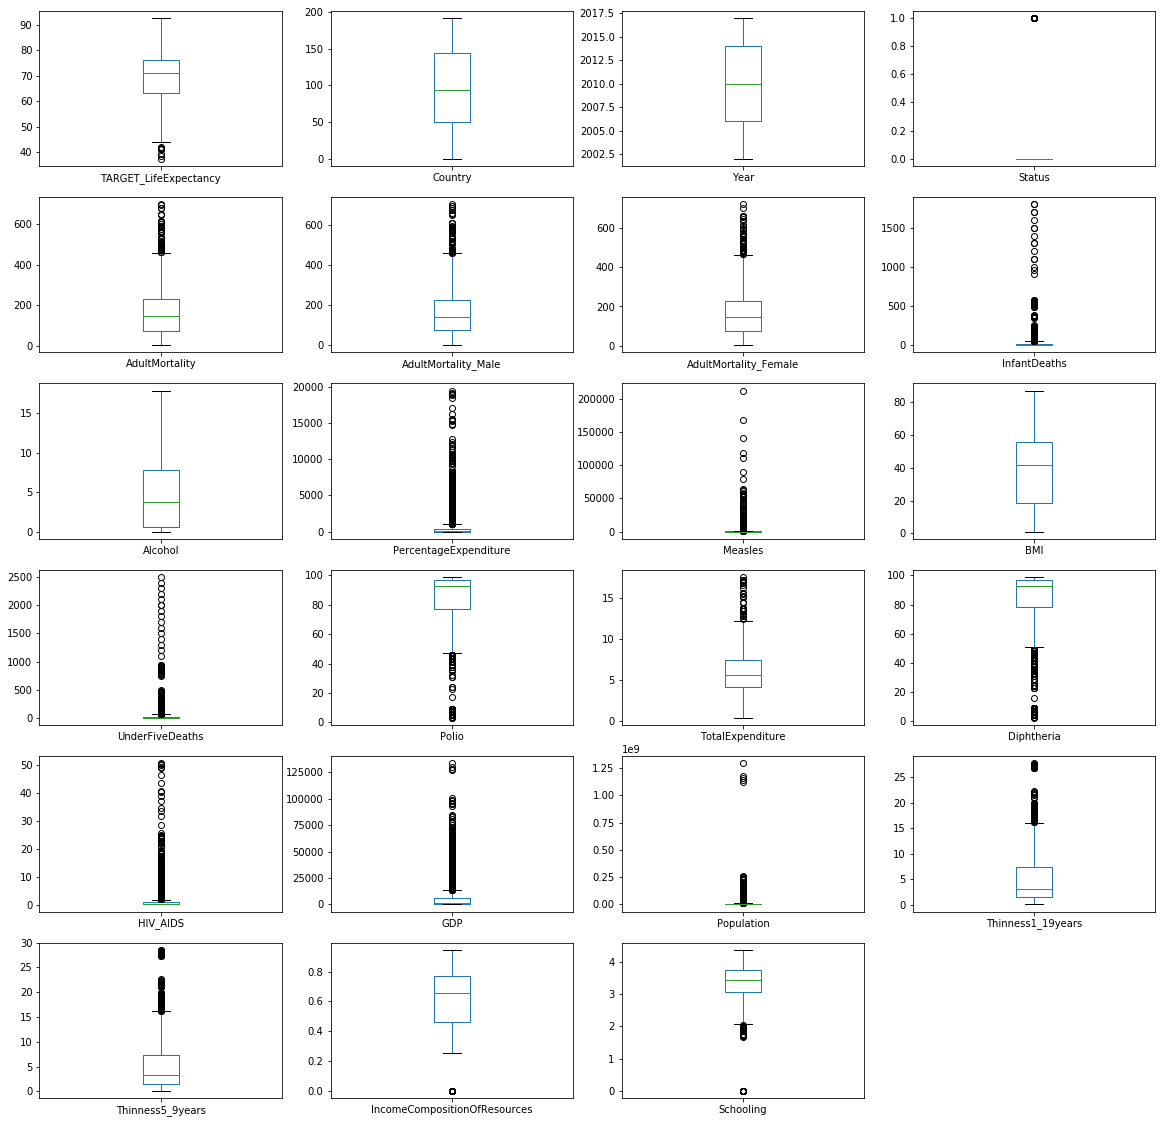

In [21]:
# Create boxplots of each variable
life_exp_train.plot(kind='box', subplots=True, layout=(6,4),
                     sharex=False, sharey=False, figsize=(20,20))
# save to a file
plt.savefig('a1_boxplots.png')
plt.show()

Interestingly, the boxplots revealed a number of variables did in fact contain outliers. This is important as linear regression models are sensitive to outliers. Therefore, I will need to select a model that reduces the effect of outliers. I could try to normalise the data using robust scaling. 

## Feature Scaling
The scale of features is one practical issue that regression needs to address. Applying feature scaling techniques can improve the performance of my models by standardising the range of features in the data. Looking at the  distributions of each feature, I need to apply some feature scaling as I would like to keep the scale of all features to the same proportion [[8]](#References).

Min-max scaling and standard scaling are sensitive to outliers. And standard scaling assumes that the data is normally distributed. However, robust scaling is robust to outliers. Without any domain knowledge regarding this data, I will transform the data using a min-max scaling and robust scaling techniques [[9]](#References).

In [22]:
# Create a copy of the training and test data
life_exp_train_scaled = life_exp_train.copy()
life_exp_test_scaled = life_exp_test.copy()

In [23]:
# Features with no suspected outliers and are not normally distributed
features1 = ['Country', 'Year', 'Status', 'Alcohol', 'BMI']

for feature in features1:
    # Apply min-max scaling to training data
    life_exp_train_scaled[[feature]] = preprocessing.MinMaxScaler().fit_transform(life_exp_train_scaled[[feature]].values)
    # Apply min-max scaling to test data 
    life_exp_test_scaled[[feature]] = preprocessing.MinMaxScaler().fit_transform(life_exp_test_scaled[[feature]].values)

In [24]:
# Features with suspected outliers
features2 = ['AdultMortality', 'AdultMortality_Male',
             'AdultMortality_Female', 'InfantDeaths', 'PercentageExpenditure',
            'Measles', 'UnderFiveDeaths', 'Polio', 'TotalExpenditure', 'Diphtheria',
            'HIV_AIDS', 'GDP', 'Population', 'Thinness1_19years', 'Thinness5_9years',
            'IncomeCompositionOfResources', 'Schooling']

for feature in features2:
    # Apply robust scaling (IQR) to training data
    life_exp_train_scaled[[feature]] = preprocessing.RobustScaler().fit_transform(life_exp_train_scaled[[feature]].values)
    # Apply robust scaling (IRQ) to test data 
    life_exp_test_scaled[[feature]] = preprocessing.RobustScaler().fit_transform(life_exp_test_scaled[[feature]].values)

<Figure size 432x288 with 0 Axes>

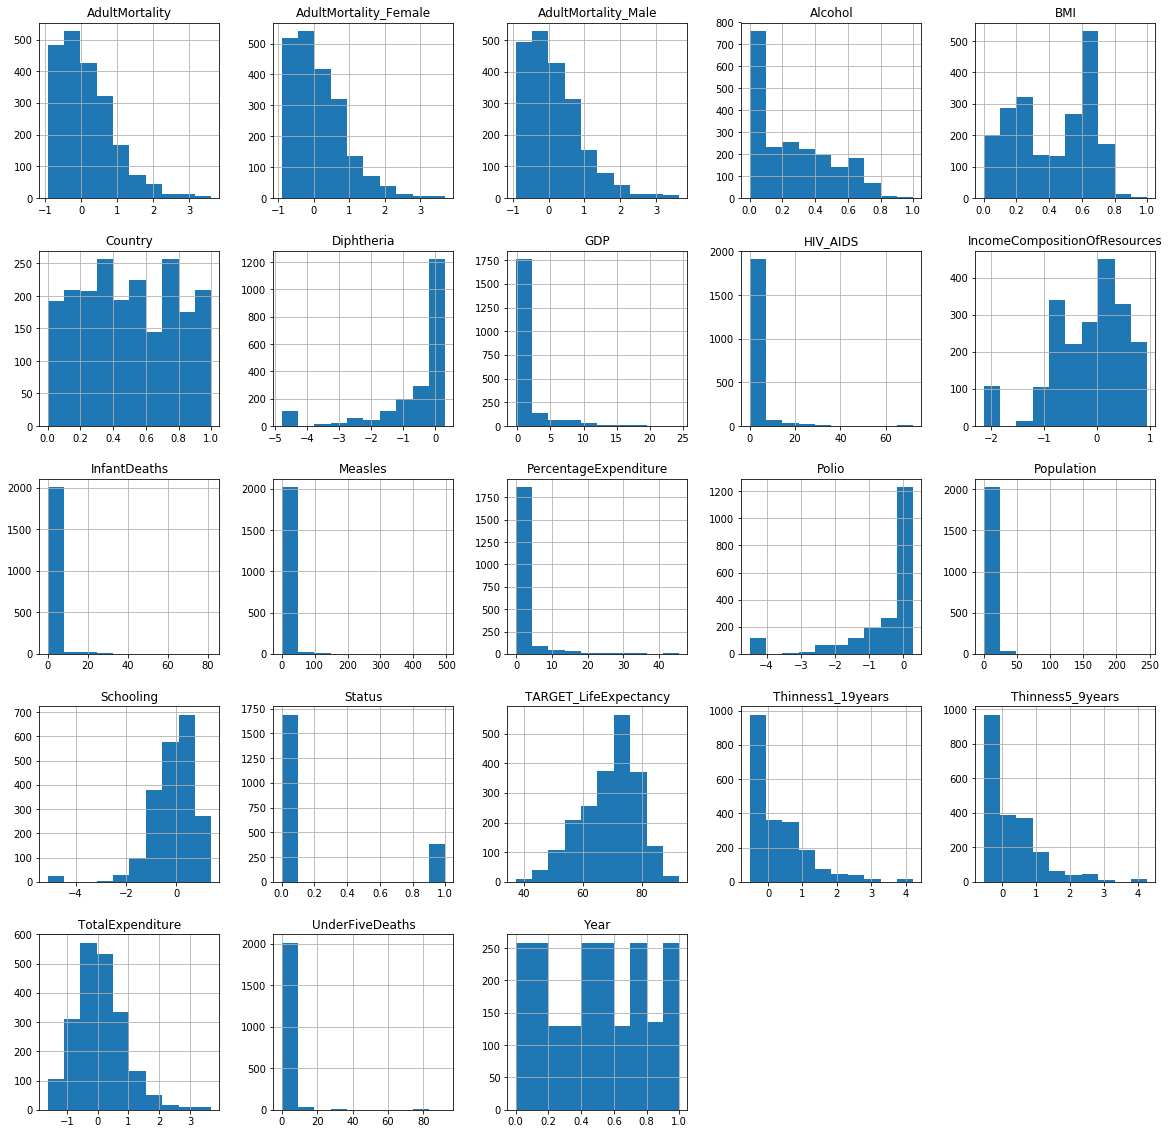

In [25]:
# - Review the histograms for the scaled data
# Plot a histogram of each variable
plt.figure()
life_exp_train_scaled.hist(figsize=(20,20))
# save to a file
plt.savefig('a1_scaled_histograms.png')
plt.show()

# Statistical Modelling and Performance Evaluation

## Basic Multivariate Linear Regression using Hold Out Sampling<a id="Basic-Multivariate-Linear-Regression-using-Hold-Out-Sampling"></a>

### Pre Process Data

In [26]:
# Creates a X variable from the data frame (all variables), and a Y variable for target
X = life_exp_train_scaled.drop('TARGET_LifeExpectancy', axis=1) 
Y = life_exp_train_scaled[['TARGET_LifeExpectancy']]
# Check X variable contains a data frame of multiple variables
X.head()

,Country,Year,Status,AdultMortality,AdultMortality_Male,AdultMortality_Female,InfantDeaths,Alcohol,PercentageExpenditure,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness1_19years,Thinness5_9years,IncomeCompositionOfResources,Schooling
0,0.369792,0.466667,0.0,0.935065,0.883117,0.987179,0.227273,0.416013,1.015008,-0.014052,...,0.05,-0.756173,0.000000,0.000000,1.143721,2.828552,-0.137931,-0.135593,0.323002,0.568908
1,0.437500,0.333333,0.0,1.188312,1.220779,1.153846,1.318182,0.011198,-0.160062,0.187354,...,-1.70,-0.870370,-1.789474,3.714286,-0.254417,1.721606,1.051724,1.016949,-1.008157,-1.303198
2,0.531250,0.466667,0.0,2.279221,2.415584,2.128205,0.636364,0.083427,-0.021142,0.070258,...,-2.35,-0.382716,-2.368421,12.714286,-0.178944,-0.116230,1.068966,1.033898,-1.060359,-1.420210
3,0.286458,0.000000,1.0,0.480519,0.519481,0.448718,-0.136364,0.398656,0.523156,-0.044496,...,0.15,0.111111,0.157895,0.000000,0.434342,-0.079234,-0.068966,-0.084746,0.199021,0.372514
4,0.229167,0.533333,0.0,0.110390,0.181818,0.051282,0.136364,0.342105,-0.046962,-0.044496,...,-0.35,-0.444444,-0.578947,1.857143,-0.155242,0.059390,0.034483,0.000000,0.120718,0.189534


### Training and Validataion Data
Use hold out sampling method to create training and validation data splits using the training data [[4]](#References).

In [27]:
# - Setup training and validation data splits
trainX, validX, trainY, validY = train_test_split(np.array(X), np.array(Y), test_size=0.2, random_state = 55) 

# Check record counts (number of rows and columns) for the training and validation data
print(trainX.shape) 
print(validX.shape) 
print(trainY.shape) 
print(validY.shape)

(1656, 22)
(415, 22)
(1656, 1)
(415, 1)


### Train Model

In [28]:
# Create a linear regression model object
lr_model1 = linear_model.LinearRegression(normalize=True)

# Fit the training data to the model
lr_model1.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### Model Prediction
Using the validation data, predict the Y value for each input X value. The predictions are stored in ``predY_model1``.

In [90]:
# Predict Y
predY_model1 = lr_model1.predict(validX)
print(predY_model1.shape)

(207, 1)


### Model Evaluation

Evaluate the model using explained variance, R-squared, root mean squared error (RMSE), mean absolute error (MAE), mean squared error (MSE) and median absolute error (MedAE) [[2]](#References)[[4]](#References)[[10]](#References)[[11]](#References).

In [30]:
print("Evaluation Metrics\n")
# R-squared (R2) (best score = 1.0)
r2 = r2_score(validY, predY_model1)
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(validY, predY_model1))
# Mean Absolute Error (MAE)
mae = mean_absolute_error(validY, predY_model1)
# Mean Squared Error (MSE)
mse = mean_squared_error(validY, predY_model1)
# Median Absolute Error (MedAE) robust to outliers
medae = median_absolute_error(validY, predY_model1)

print("R-squared (R2):", r2.round(4))
print("Root Mean Square Error (RMSE):", rmse.round(4))
print('Mean Absolute Error (MAE):', mae.round(4))
print('Mean Squared Error (MSE):', mse.round(4))
print('Median Absolute Error (MedAE):', medae.round(4))

Evaluation Metrics

R-squared (R2): 0.6997
Root Mean Square Error (RMSE): 5.2112
Mean Absolute Error (MAE): 3.8392
Mean Squared Error (MSE): 27.1568
Median Absolute Error (MedAE): 2.9481


### Residual Plots

Now lets check the residuals versus the predicted values to look for the independence assumption. If the residuals are distributed uniformly randomly around the zero x-axes and do not form specific clusters, then the independence assumption holds true [[12]](#References).

Also, check the standardised residuals versus predicted values to look for the homoscedasticity assumption. If the points are equally distributed (the variance of error terms is similar) across all values of the independent variables, then the homoscedasticity assumption holds true [[12]](#References)[[13]](#References).

Morover, check the standardised residuals versus the theoretical quantiles (Q-Q-Plot) to look for the multivariate normality assumption.

In [31]:
# - Check the difference between actual and predicted values 
# Create pandas dataframe from numpy arrays
# Residual = Observed Y – Predicted Y
# Standardized Residual = (Observed Y – Predicted Y) / √ Predicted Y
residuals_model1 = pd.DataFrame({'Actual': validY[:, 0], 
                   'Predicted': predY_model1[:, 0], 
                   'Residual': validY[:, 0] - predY_model1[:, 0], 
                   'Standardised Residual': (validY[:, 0] - predY_model1[:, 0]) / (np.sqrt(predY_model1[:, 0]))
                   })
# Check
residuals_model1.head(5)

,Actual,Predicted,Residual,Standardised Residual
0,81.4,83.262903,-1.862903,-0.204157
1,48.8,42.547714,6.252286,0.958519
2,69.0,67.313419,1.686581,0.205568
3,55.9,63.312660,-7.412660,-0.931599
4,73.2,75.934015,-2.734015,-0.313749


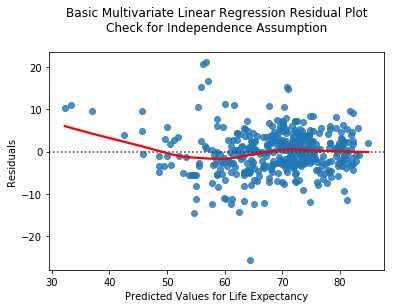

In [32]:
# Independence Assumption
# - Residuals on the vertical axis (Y)  
# - Predicted (Y) on the horizontal
ax = sns.residplot(residuals_model1['Predicted'], residuals_model1['Residual'], lowess=True,
                  line_kws={"color": "red"})
ax.set(xlabel='Predicted Values for Life Expectancy', ylabel='Residuals')
plt.title("Basic Multivariate Linear Regression Residual Plot\nCheck for Independence Assumption\n")
plt.show()

The calculated lowess smoothed line through the points indicates there may be a nonlinear structure in the residuals, and it's probably worth testing other models (e.g. polynomials).

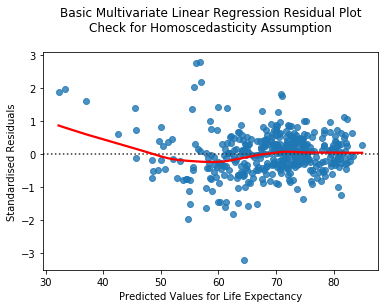

In [33]:
# Homoscedasticity Assumption
# - Standardised Residuals on the vertical axis (Y)  
# - Predicted (Y) on the horizontal
ax = sns.residplot(residuals_model1['Predicted'], residuals_model1['Standardised Residual'], lowess=True,
                  line_kws={"color": "red"})
ax.set(xlabel='Predicted Values for Life Expectancy', ylabel='Standardised Residuals')
plt.title("Basic Multivariate Linear Regression Residual Plot\nCheck for Homoscedasticity Assumption\n")
plt.show()

The variance of the standardised residuals is not consistent across the entire range of predicted values. There seems to be a slight negative, then positive trend in the lowess smoother. This could be indicative of heteroskedasticity.

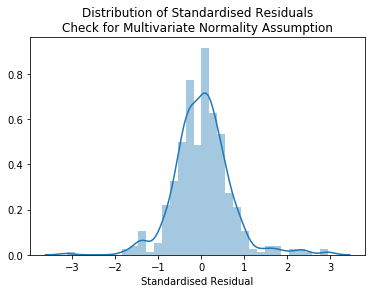

In [34]:
# Multivariate Normality Assumption 
# Histogram of the standardised residuals
sns.distplot(a=residuals_model1['Standardised Residual'])
plt.title('Distribution of Standardised Residuals\nCheck for Multivariate Normality Assumption', size=12)
plt.show()

Text(0.5, 1.0, 'Normal Q-Q\nCheck for Multivariate Normality Assumption\n')

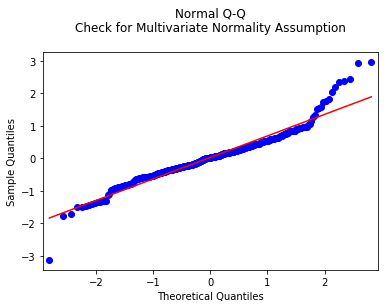

In [35]:
## QQ Plot of the standardised residuals
import statsmodels.api as sm 
sm.qqplot(residuals_model1['Standardised Residual'], line ='s') 
plt.title("Normal Q-Q\nCheck for Multivariate Normality Assumption\n")

Looking at the histogram and the normal Q-Q plot, the standardised residuals do not follow a normal distribution. The residuals that are less than -2 mean that the observed frequency is less than the expected frequency. And residuals greater than 2 mean that the observed frequency is greater than the expected frequency [[13]](#References).

### Magnitude of model coefficients

Evaluate model coefficients to determine the importance of each feature in the model.

In [36]:
# Get the slope and intercept of the line best fit\n",
print("Model intercept (θ0): ", lr_model1.intercept_[0], "\n")

# Store the model coefficients
print("Model slope (θ1) (for all X variables):\n")
coeff_df = pd.DataFrame(lr_model1.coef_[0], X.columns, columns=['Coefficient'])
print(coeff_df)

Model intercept (θ0):  68.6781907933926 

Model slope (θ1) (for all X variables):

                              Coefficient
Country                          0.349320
Year                             0.725441
Status                           2.509422
AdultMortality                  -0.963995
AdultMortality_Male             -0.962043
AdultMortality_Female           -0.970566
InfantDeaths                     1.834460
Alcohol                          3.003156
PercentageExpenditure           -0.026049
Measles                         -0.002270
BMI                              2.497370
UnderFiveDeaths                 -1.672474
Polio                            0.390617
TotalExpenditure                 0.122537
Diphtheria                       0.568497
HIV_AIDS                        -0.379686
GDP                              0.242307
Population                      -0.006536
Thinness1_19years               -0.482122
Thinness5_9years                -0.110988
IncomeCompositionOfResources     1.

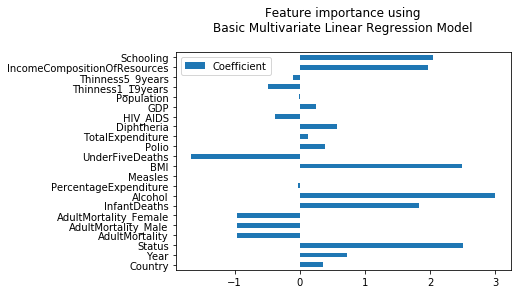

In [37]:
# Create a horizontal bar chart of coefficients
coeff_df.plot(kind = "barh") 
plt.title("Feature importance using\nBasic Multivariate Linear Regression Model\n")
plt.show()

## Polynomial Regression using Hold Out Sampling<a id="Polynomial-Regression-using-Hold-Out-Sampling]"></a>

Fit polynomial models with variying degrees of the polynomial features.

In [38]:
# List of degrees
degrees = [4, 3, 2]

In [39]:
# Try different degree of the polynomial features
for deg in degrees:   

    # Fitting Polynomial Regression to the dataset
    # Create a polynomial regression object
    poly_model2 = PolynomialFeatures(degree=deg, include_bias=True)

    # - Train Model
    # Fit the training data to the model
    polyFitTrainX = poly_model2.fit_transform(trainX) 
    # Fit the validation data to the model
    polyFitValidX = poly_model2.fit_transform(validX)

    # Create a linear regression model object
    polylr_model = linear_model.LinearRegression(normalize=False)

    # Fit the training data to the model
    polylr_model.fit(polyFitTrainX, trainY)

    # Predict on Validation Data
    predY_model2 = polylr_model.predict(polyFitValidX)
    
    # - EVALUATION
    print("Evaluation Metrics for Degree", deg, "\n")
    # R-squared (R2) (best score = 1.0)
    r2 = r2_score(validY, predY_model2)
    # Root Mean Square Error (RMSE)
    rmse = np.sqrt(mean_squared_error(validY, predY_model2))
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(validY, predY_model2)
    # Mean Squared Error (MSE)
    mse = mean_squared_error(validY, predY_model2)
    # Median Absolute Error (MedAE) robust to outliers
    medae = median_absolute_error(validY, predY_model2)

    print("R-squared (R2):", r2.round(4))
    print("Root Mean Square Error (RMSE):", rmse.round(4))
    print('Mean Absolute Error (MAE):', mae.round(4))
    print('Mean Squared Error (MSE):', mse.round(4))
    print('Median Absolute Error (MedAE):', medae.round(4))
    print()

Evaluation Metrics for Degree 4 

R-squared (R2): -182612198.9942
Root Mean Square Error (RMSE): 128506.2456
Mean Absolute Error (MAE): 8065.4125
Mean Squared Error (MSE): 16513855160.8598
Median Absolute Error (MedAE): 11.8347

Evaluation Metrics for Degree 3 

R-squared (R2): -3110.0357
Root Mean Square Error (RMSE): 530.4102
Mean Absolute Error (MAE): 145.3865
Mean Squared Error (MSE): 281334.9418
Median Absolute Error (MedAE): 16.4201

Evaluation Metrics for Degree 2 

R-squared (R2): 0.7297
Root Mean Square Error (RMSE): 4.9443
Mean Absolute Error (MAE): 3.027
Mean Squared Error (MSE): 24.4458
Median Absolute Error (MedAE): 2.2126



Negative R-squared indicates that the chosen model fits the data really poorly. The polynomial model with degree of 2 is very similar to the linear regression model. This indicates that I still need some regularisation to handle the outliers in the data.

Lets visualise the results from degree 2.

### Residual Plots

In [40]:
# - Check the difference between actual and predicted values 
# Create pandas dataframe from numpy arrays
# Residual = Observed Y – Predicted Y
# Standardized Residual = (Observed Y – Predicted Y) / √ Predicted Y
residuals_model2 = pd.DataFrame({'Actual': validY[:, 0], 
                   'Predicted': predY_model2[:, 0], 
                   'Residual': validY[:, 0] - predY_model2[:, 0], 
                   'Standardised Residual': (validY[:, 0] - predY_model2[:, 0]) / (np.sqrt(predY_model2[:, 0]))
                   })

# Fill any null values
residuals_model2.isna().sum()
residuals_model2 = residuals_model2.fillna(0.0)

# Check
residuals_model2.head(5)

,Actual,Predicted,Residual,Standardised Residual
0,81.4,84.511044,-3.111044,-0.338415
1,48.8,44.756341,4.043659,0.604432
2,69.0,67.278097,1.721903,0.209929
3,55.9,59.978018,-4.078018,-0.526566
4,73.2,76.323884,-3.123884,-0.357573


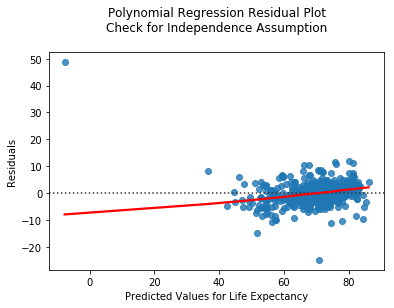

In [41]:
# Independence Assumption
# - Residuals on the vertical axis (Y)  
# - Predicted (Y) on the horizontal
ax = sns.residplot(residuals_model2['Predicted'], residuals_model2['Residual'], lowess=True,
                  line_kws={"color": "red"})
ax.set(xlabel='Predicted Values for Life Expectancy', ylabel='Residuals')
plt.title("Polynomial Regression Residual Plot\nCheck for Independence Assumption\n")
plt.show()

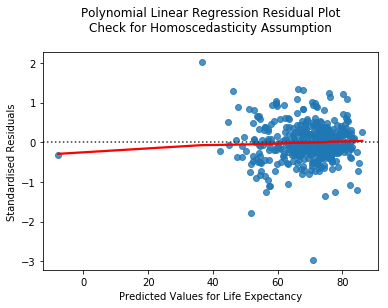

In [42]:
# Homoscedasticity Assumption
# - Standardised Residuals on the vertical axis (Y)  
# - Predicted (Y) on the horizontal
ax = sns.residplot(residuals_model2['Predicted'], residuals_model2['Standardised Residual'], lowess=True,
                  line_kws={"color": "red"})
ax.set(xlabel='Predicted Values for Life Expectancy', ylabel='Standardised Residuals')
plt.title("Polynomial Linear Regression Residual Plot\nCheck for Homoscedasticity Assumption\n")
plt.show()

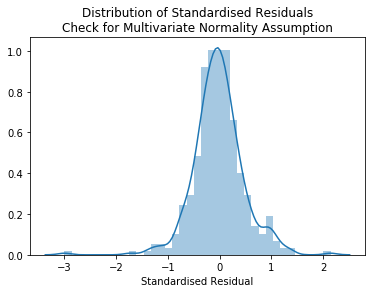

In [43]:
# Multivariate Normality Assumption 
# Histogram of the standardised residuals
sns.distplot(a=residuals_model2['Standardised Residual'])
plt.title('Distribution of Standardised Residuals\nCheck for Multivariate Normality Assumption', size=12)
plt.show()

Text(0.5, 1.0, 'Normal Q-Q\nCheck for Multivariate Normality Assumption\n')

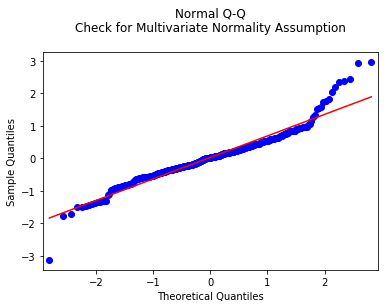

In [44]:
## QQ Plot of the standardised residuals
import statsmodels.api as sm 
sm.qqplot(residuals_model1['Standardised Residual'], line ='s') 
plt.title("Normal Q-Q\nCheck for Multivariate Normality Assumption\n")

## Linear Ridge Regression (L2 Regularisation) using Hold Out Sampling<a id="Ridge Regression-(L2-Regularisation)-using-Hold-Out-Sampling"></a>

Based on the previous models evaluation results, I need to try a regularisation technique to address the model complexity, multi-collinearity, and outliers in the data. As a first pass, I will try linear ridge regression model with a lambda (called alpha in scikit-learn) value of 1. 

In [45]:
# Create a ridge regression model object   
ridge_model3 = linear_model.Ridge(alpha=1, normalize=True, solver='auto', random_state = 15)

# Fit the training data to the model
ridge_model3.fit(trainX, trainY)

# - Model Prediction
# Using the validation data, predict the Y value for each input X value. 
predY_model3 = ridge_model3.predict(validX)
print(predY_model3.shape)

(415, 1)


In [46]:
# - EVALUATION
print("Evaluation Metrics\n")
# R-squared (R2) (best score = 1.0)
r2 = r2_score(validY, predY_model3)
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(validY, predY_model3))
# Mean Absolute Error (MAE)
mae = mean_absolute_error(validY, predY_model3)
# Mean Squared Error (MSE)
mse = mean_squared_error(validY, predY_model3)
# Median Absolute Error (MedAE) robust to outliers
medae = median_absolute_error(validY, predY_model3)

print("R-squared (R2):", r2.round(4))
print("Root Mean Square Error (RMSE):", rmse.round(4))
print('Mean Absolute Error (MAE):', mae.round(4))
print('Mean Squared Error (MSE):', mse.round(4))
print('Median Absolute Error (MedAE):', medae.round(4))

Evaluation Metrics

R-squared (R2): 0.6977
Root Mean Square Error (RMSE): 5.2289
Mean Absolute Error (MAE): 3.8799
Mean Squared Error (MSE): 27.3411
Median Absolute Error (MedAE): 3.0065


#### Residual Plot

In [47]:
### Residual Plots
# - Check the difference between actual and predicted values 
# Create pandas dataframe from numpy arrays
# Residual = Observed Y – Predicted Y
# Standardized Residual = (Observed Y – Predicted Y) / √ Predicted Y
residuals_model3 = pd.DataFrame({'Actual': validY[:, 0], 
                   'Predicted': predY_model3[:, 0], 
                   'Residual': validY[:, 0] - predY_model3[:, 0], 
                   'Standardised Residual': (validY[:, 0] - predY_model3[:, 0]) / (np.sqrt(predY_model3[:, 0]))
                   })

# Fill any null values
#residuals_model3.isna().sum()
#residuals_model3 = residuals_model3.fillna(0.0)

# Check
residuals_model3.head(5)

,Actual,Predicted,Residual,Standardised Residual
0,81.4,82.066094,-0.666094,-0.073528
1,48.8,49.035336,-0.235336,-0.033607
2,69.0,67.820265,1.179735,0.143253
3,55.9,63.791904,-7.891904,-0.988096
4,73.2,74.948991,-1.748991,-0.202025


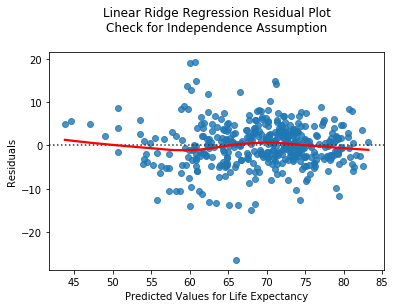

In [48]:
# Independence Assumption
# - Residuals on the vertical axis (Y)  
# - Predicted (Y) on the horizontal
ax = sns.residplot(residuals_model3['Predicted'], residuals_model3['Residual'], lowess=True,
                  line_kws={"color": "red"})
ax.set(xlabel='Predicted Values for Life Expectancy', ylabel='Residuals')
plt.title("Linear Ridge Regression Residual Plot\nCheck for Independence Assumption\n")
plt.show()

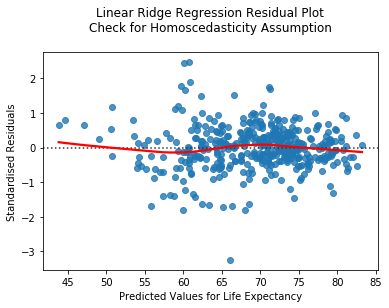

In [49]:
# Homoscedasticity Assumption
# - Standardised Residuals on the vertical axis (Y)  
# - Predicted (Y) on the horizontal
ax = sns.residplot(residuals_model3['Predicted'], residuals_model3['Standardised Residual'], lowess=True,
                  line_kws={"color": "red"})
ax.set(xlabel='Predicted Values for Life Expectancy', ylabel='Standardised Residuals')
plt.title("Linear Ridge Regression Residual Plot\nCheck for Homoscedasticity Assumption\n")
plt.show()

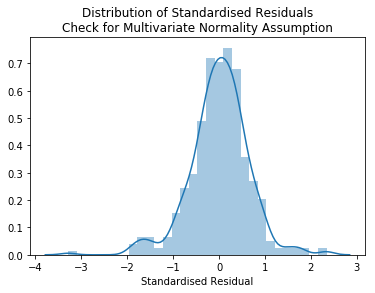

In [50]:
# Multivariate Normality Assumption 
# Histogram of the standardised residuals
import seaborn as sns
sns.distplot(a=residuals_model3['Standardised Residual'])
plt.title('Distribution of Standardised Residuals\nCheck for Multivariate Normality Assumption', size=12)
plt.show()

Text(0.5, 1.0, 'Normal Q-Q\nCheck for Multivariate Normality Assumption\n')

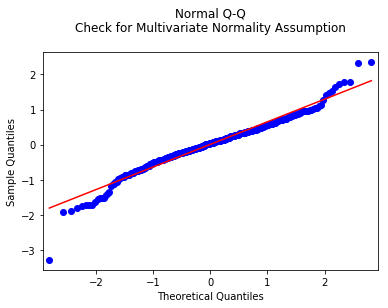

In [51]:
## QQ Plot of the standardised residuals
import statsmodels.api as sm 
sm.qqplot(residuals_model3['Standardised Residual'], line ='s') 
plt.title("Normal Q-Q\nCheck for Multivariate Normality Assumption\n")

### Magnitude of model coefficients

In [52]:
# Get the slope and intercept of the line best fit\n",
print("Model intercept (θ0): ", ridge_model3.intercept_[0], "\n")

# Store the model coefficients
print("Model slope (θ1) (for all X variables):\n")
coeff_df = pd.DataFrame(ridge_model3.coef_[0], X.columns, columns=['Coefficient'])
print(coeff_df)

Model intercept (θ0):  68.37178165024375 

Model slope (θ1) (for all X variables):

                              Coefficient
Country                          0.211097
Year                             0.901862
Status                           1.755687
AdultMortality                  -1.056069
AdultMortality_Male             -1.053397
AdultMortality_Female           -1.063810
InfantDeaths                    -0.004608
Alcohol                          2.264698
PercentageExpenditure            0.061110
Measles                         -0.008854
BMI                              2.819350
UnderFiveDeaths                 -0.015826
Polio                            0.481120
TotalExpenditure                 0.193636
Diphtheria                       0.558186
HIV_AIDS                        -0.204918
GDP                              0.151839
Population                       0.008357
Thinness1_19years               -0.433885
Thinness5_9years                -0.364610
IncomeCompositionOfResources     1

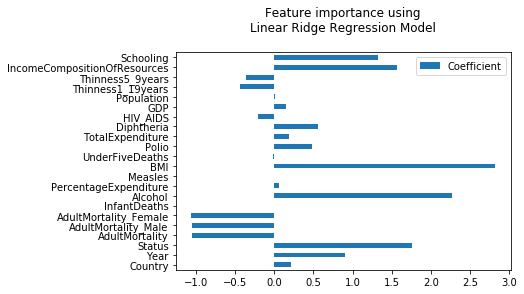

In [53]:
# Create a horizontal bar chart of coefficients
coeff_df.plot(kind = "barh") 
plt.title("Feature importance using\nLinear Ridge Regression Model\n")
plt.show()

## Polynomial Ridge Regression (L2 Regularisation) using k-Fold Cross Validation<a id="Polynomial-Ridge-Regression-(L2-Regularisation)-using-k-Fold-Cross-Validation"></a>

As there is curvilinear relationships in my data, I will try a 2nd degree polynomial ridge regression model. This time, to determine the best value for lambda I will use 10-fold cross validation. 

### k-Fold Cross Validation

Use k-fold cross validation to create multiple splits of train/validation sets on the training data [[4]](#References).
K-fold cross validation will help me evaluate parameters and to perform testing. I will setup a 10-fold cross validation with a data shuffle [[14]](#References).

In [54]:
# Define the number of splits
number_splits = 10 

# Initialise k-fold cross validation object (and shuffle the data beforehand)
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True, random_state=55)

### Regularisation Parameter Selection

In [55]:
# Setup parameter selection
lRegPara = np.linspace(0.0005, 0.01, num=20)

### Polynomial Ridge Regression Models

Text(0, 0.5, 'MedAE')

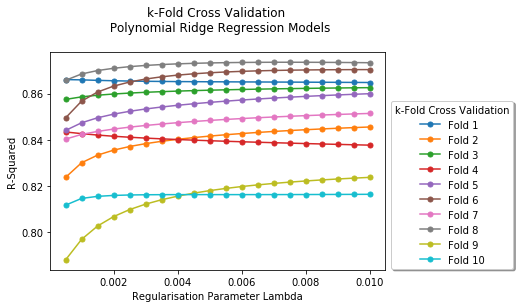

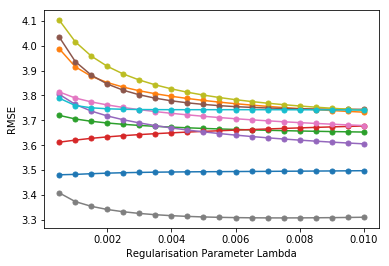

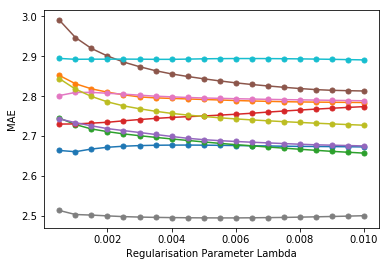

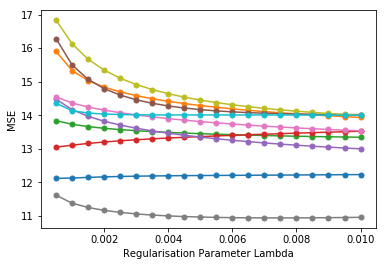

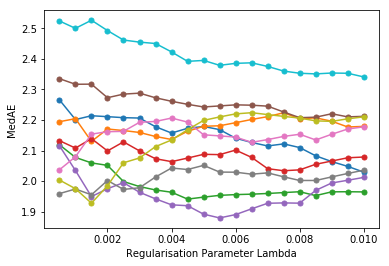

In [56]:
# Define empty figure objects
fig1, ax1 = plt.subplots() 
fig2, ax2 = plt.subplots() 
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()

# Define evaluation metric lists
r2Results = np.zeros((number_splits, len(lRegPara))) 
rmseResults = np.zeros((number_splits, len(lRegPara))) 
maeResults = np.zeros((number_splits, len(lRegPara))) 
mseResults = np.zeros((number_splits, len(lRegPara))) 
medaeResults = np.zeros((number_splits, len(lRegPara))) 

# Initialise the split iterator
nsplit = 0 

# Create a polynomial regression object
poly_model4 = PolynomialFeatures(degree=2, include_bias=True)

# Generate indices to split data into training and validation sets (enumerate k)
for trainIndex, validIndex in kFold.split(X):
    
    # Print the indices
    #print("TRAIN:", trainIndex, "VALIDATE:", validIndex)
    # Print the k-fold iterator
    #print("k-fold: {0}". format(nsplit))
       
    # - Setup training and validation data splits
    # For each k-fold splits, gets the training and validation data for that split 
    trainX = np.array(X.loc[trainIndex]) 
    trainY = np.array(Y.loc[trainIndex]) 
    validX = np.array(X.loc[validIndex]) 
    validY = np.array(Y.loc[validIndex])
    
    # - Train Model
    # Fit the training data to the model
    polyFitTrainX = poly_model4.fit_transform(trainX) 
    # Fit the validation data to the model
    polyFitValidX = poly_model4.fit_transform(validX)
    
    # Iterate through each regularisation parameter 
    for j, regPara in enumerate(lRegPara):   
        
        # Print regularisation parameter iterator
        #print("reg index: {0}". format(j))
        # Print regularisation parameter
        #print("reg param: {0}". format(regPara))

        # - Create a ridge regression model object   
        # For each fold-parameter pairing, a regularised polynomial is trained
        # Lambda (alpha) is the regularisation parameter 
        # Normalise the data 
        # Solver - used in the computational routines (automatically)
        polyRidgeReg = linear_model.Ridge(alpha=regPara, normalize=True, solver='auto', random_state = 55) 
        
        # - Train Ridge Regression Model
        # Fit the training data (k-fold) to the model
        polyRidgeReg.fit(polyFitTrainX, trainY) 
        
        # - Ridge Regression Model Prediction
        # Using the validation data (k-fold), 
        # predict the Y value for each input X value 
        predY = polyRidgeReg.predict(polyFitValidX) 
       
        # - Ridge Regression Model Evaluation
        # R-squared (R2) (best score = 1.0)
        r2 = r2_score(validY, predY)    
        # Root Mean Square Error (RMSE)
        rmse = np.sqrt(mean_squared_error(validY, predY))
        # Mean Absolute Error (MAE)
        mae = mean_absolute_error(validY, predY)
        # Mean Squared Error (MSE)
        mse = mean_squared_error(validY, predY)
        # Median Absolute Error (MedAE) robust to outliers
        medae = median_absolute_error(validY, predY)
        # - Store the resulting model metrics to the results lists
        r2Results[nsplit, j] = r2   
        rmseResults[nsplit, j] = rmse
        maeResults[nsplit, j] = mae
        mseResults[nsplit, j] = mse
        medaeResults[nsplit, j] = medae
    
    # Update plot1
    ax1.plot(lRegPara, r2Results[nsplit, :], label='Fold '+ str(nsplit+1),
             marker='o', markersize=5) 
    
    # Update plot2
    ax2.plot(lRegPara, rmseResults[nsplit, :], label='Fold '+ str(nsplit+1),
             marker='o', markersize=5) 
    
    # Update plot3
    ax3.plot(lRegPara, maeResults[nsplit, :], label='Fold '+ str(nsplit+1),
             marker='o', markersize=5) 
    
    # Update plot4
    ax4.plot(lRegPara, mseResults[nsplit, :], label='Fold '+ str(nsplit+1),
             marker='o', markersize=5) 
    
    # Update plot5
    ax5.plot(lRegPara, medaeResults[nsplit, :], label='Fold '+ str(nsplit+1),
             marker='o', markersize=5) 
    
    # Increment the k-fold iterator 
    nsplit = nsplit + 1

# Update Plots
# Define plot labels and legend
# Plot 1 - R-Squared
ax1.set_xlabel("Regularisation Parameter Lambda") 
ax1.set_ylabel("R-Squared") 
ax1.set_title("k-Fold Cross Validation \n Polynomial Ridge Regression Models\n")
ax1.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1, title="k-Fold Cross Validation")

# Plot 2 - RMSE
ax2.set_xlabel("Regularisation Parameter Lambda") 
ax2.set_ylabel("RMSE") 

# PLot 3 - MAE
ax3.set_xlabel("Regularisation Parameter Lambda") 
ax3.set_ylabel("MAE") 

# PLot 4 - MSE
ax4.set_xlabel("Regularisation Parameter Lambda") 
ax4.set_ylabel("MSE") 

# Plot 5 - MedAE
ax5.set_xlabel("Regularisation Parameter Lambda") 
ax5.set_ylabel("MedAE") 

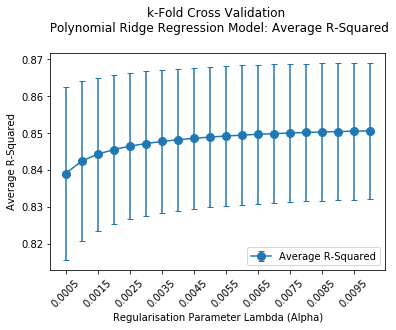

In [59]:
# Once all k-folds have been run

# - Create an new plot
# Define the plot
plt.figure() 
# Plot error bar: average and std dev of r2
plt.errorbar(x=lRegPara, y=np.mean(r2Results, axis=0),
             yerr=np.std(r2Results,axis=0), capsize=3, label='Average R-Squared',
             marker='o', markersize=8)
# Update x-axis
plt.xticks(np.arange(0.0005, 0.01, step=0.001), rotation=45)
# Update the labels
plt.xlabel("Regularisation Parameter Lambda (Alpha)") 
plt.ylabel("Average R-Squared")
plt.title("k-Fold Cross Validation \n Polynomial Ridge Regression Model: Average R-Squared\n")
plt.legend()
# save to a file
plt.savefig('a1_avg_r2_poly_ridge_regression.png')

In [60]:
# Average evalution metrics
print("Average Evaluation Metrics\n")
print("R-squared (R2):", np.mean(r2Results).round(4))
print("Root Mean Square Error (RMSE):", np.mean(rmseResults).round(4))
print('Mean Absolute Error (MAE):', np.mean(maeResults).round(4))
print('Mean Squared Error (MSE):', np.mean(mseResults).round(4))
print('Median Absolute Error (MedAE):', np.mean(medaeResults).round(4))

Average Evaluation Metrics

R-squared (R2): 0.8479
Root Mean Square Error (RMSE): 3.6703
Mean Absolute Error (MAE): 2.7413
Mean Squared Error (MSE): 13.4958
Median Absolute Error (MedAE): 2.1323


## Polynomial Ridge Regression (L2 Regularisation) using k-Fold Cross Validation (lambda=0.01)

I ran the model again with lambda set to 0.01 (best parameter).

In [61]:
# Define the number of splits
number_splits = 10 

# Initialise k-fold cross validation object (and shuffle the data beforehand)
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True, random_state=55)

In [62]:
# Setup best parameter 
lRegPara = [0.01]

Text(0, 0.5, 'MedAE')

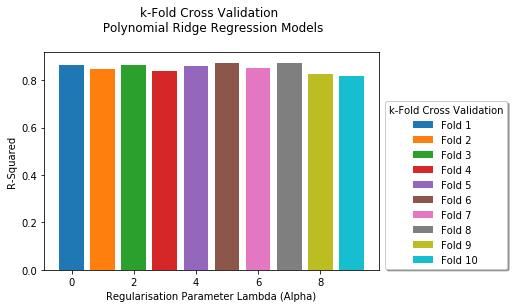

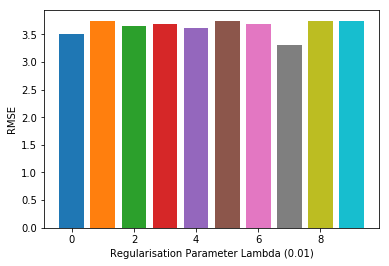

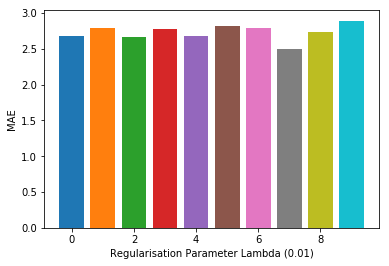

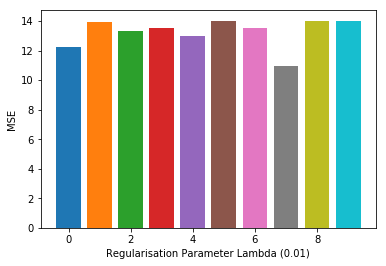

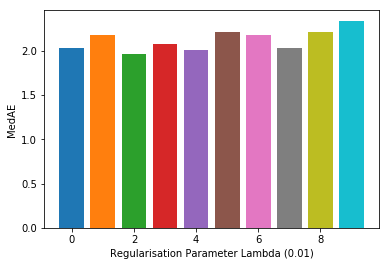

In [63]:
# Define empty figure objects
fig1, ax1 = plt.subplots() 
fig2, ax2 = plt.subplots() 
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()

# Define evaluation metric lists
r2Results = np.zeros((number_splits, len(lRegPara))) 
rmseResults = np.zeros((number_splits, len(lRegPara))) 
maeResults = np.zeros((number_splits, len(lRegPara))) 
mseResults = np.zeros((number_splits, len(lRegPara))) 
medaeResults = np.zeros((number_splits, len(lRegPara))) 

# Initialise the split iterator
nsplit = 0 

# Create a polynomial regression object
poly_model4 = PolynomialFeatures(degree=2, include_bias=True)

# Generate indices to split data into training and validation sets (enumerate k)
for trainIndex, validIndex in kFold.split(X):
    
    # Print the indices
    #print("TRAIN:", trainIndex, "VALIDATE:", validIndex)
    # Print the k-fold iterator
    #print("k-fold: {0}". format(nsplit))
       
    # - Setup training and validation data splits
    # For each k-fold splits, gets the training and validation data for that split 
    trainX = np.array(X.loc[trainIndex]) 
    trainY = np.array(Y.loc[trainIndex]) 
    validX = np.array(X.loc[validIndex]) 
    validY = np.array(Y.loc[validIndex])
    
    # - Train Model
    # Fit the training data to the model
    polyFitTrainX = poly_model4.fit_transform(trainX) 
    # Fit the validation data to the model
    polyFitValidX = poly_model4.fit_transform(validX)
    
    # Iterate through each regularisation parameter 
    for j, regPara in enumerate(lRegPara):   
        
        # Print regularisation parameter iterator
        #print("reg index: {0}". format(j))
        # Print regularisation parameter
        #print("reg param: {0}". format(regPara))

        # - Create a ridge regression model object   
        # For each fold-parameter pairing, a regularised polynomial is trained
        # Lambda (alpha) is the regularisation parameter 
        # Normalise the data 
        # Solver - used in the computational routines (automatically)
        polyRidgeReg = linear_model.Ridge(alpha=regPara, normalize=True, solver='auto', random_state = 55) 
        
        # - Train Ridge Regression Model
        # Fit the training data (k-fold) to the model
        polyRidgeReg.fit(polyFitTrainX, trainY) 
        
        # - Ridge Regression Model Prediction
        # Using the validation data (k-fold), 
        # predict the Y value for each input X value 
        predY = polyRidgeReg.predict(polyFitValidX) 
       
        # - Ridge Regression Model Evaluation
        # R-squared (R2) (best score = 1.0)
        r2 = r2_score(validY, predY)    
        # Root Mean Square Error (RMSE)
        rmse = np.sqrt(mean_squared_error(validY, predY))
        # Mean Absolute Error (MAE)
        mae = mean_absolute_error(validY, predY)
        # Mean Squared Error (MSE)
        mse = mean_squared_error(validY, predY)
        # Median Absolute Error (MedAE) robust to outliers
        medae = median_absolute_error(validY, predY)
        # - Store the resulting model metrics to the results lists
        r2Results[nsplit, j] = r2   
        rmseResults[nsplit, j] = rmse
        maeResults[nsplit, j] = mae
        mseResults[nsplit, j] = mse
        medaeResults[nsplit, j] = medae
    
    # Update plot1
    ax1.bar(nsplit, r2Results[nsplit, :], label='Fold '+ str(nsplit+1))    
    # Update plot2
    ax2.bar(nsplit, rmseResults[nsplit, :], label='Fold '+ str(nsplit+1))    
    # Update plot3
    ax3.bar(nsplit, maeResults[nsplit, :], label='Fold '+ str(nsplit+1))
    # Update plot4
    ax4.bar(nsplit, mseResults[nsplit, :], label='Fold '+ str(nsplit+1))    
    # Update plot5
    ax5.bar(nsplit, medaeResults[nsplit, :], label='Fold '+ str(nsplit+1))
    
    # Increment the k-fold iterator 
    nsplit = nsplit + 1

# Update Plots
# Define plot labels and legend
# Plot 1 - R-Squared
ax1.set_xlabel("Regularisation Parameter Lambda (Alpha)") 
ax1.set_ylabel("R-Squared") 
ax1.set_title("k-Fold Cross Validation \n Polynomial Ridge Regression Models\n")
ax1.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1, title="k-Fold Cross Validation")

# Plot 2 - RMSE
ax2.set_xlabel("Regularisation Parameter Lambda (0.01)") 
ax2.set_ylabel("RMSE") 

# PLot 3 - MAE
ax3.set_xlabel("Regularisation Parameter Lambda (0.01)") 
ax3.set_ylabel("MAE") 

# PLot 4 - MSE
ax4.set_xlabel("Regularisation Parameter Lambda (0.01)") 
ax4.set_ylabel("MSE") 

# Plot 5 - MedAE
ax5.set_xlabel("Regularisation Parameter Lambda (0.01)") 
ax5.set_ylabel("MedAE") 

In [64]:
# Average evalution metrics
print("Average Evaluation Metrics\n")
print("R-squared (R2):", np.mean(r2Results).round(4))
print("Root Mean Square Error (RMSE):", np.mean(rmseResults).round(4))
print('Mean Absolute Error (MAE):', np.mean(maeResults).round(4))
print('Mean Squared Error (MSE):', np.mean(mseResults).round(4))
print('Median Absolute Error (MedAE):', np.mean(medaeResults).round(4))

Average Evaluation Metrics

R-squared (R2): 0.8506
Root Mean Square Error (RMSE): 3.6382
Mean Absolute Error (MAE): 2.7284
Mean Squared Error (MSE): 13.2537
Median Absolute Error (MedAE): 2.124


## Polynomial Lasso Regression (L1 Regularisation) using k-Fold Cross Validation<a id="Polynomial=Lasso-Regression-(L1-Regularisation)-using-k-Fold-Cross-Validation"></a>

2nd degree polynomial lasso regression model with 10-fold cross validation.

In [65]:
# Define the number of splits
number_splits = 10 

# Initialise k-fold cross validation object (and shuffle the data beforehand)
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True, random_state=55)

### Regularisation Parameter Selection

In [66]:
# Setup parameter selection
lRegPara = np.linspace(0, 0.005, num=20)

### Polynomial Lasso Regression Models

Text(0, 0.5, 'MedAE')

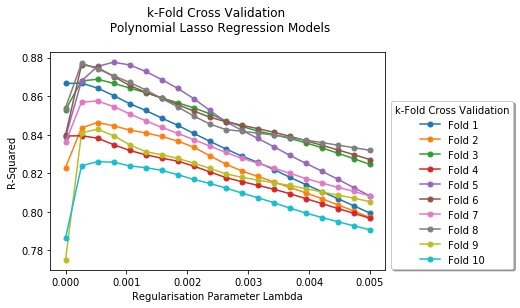

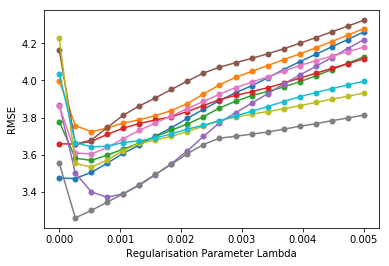

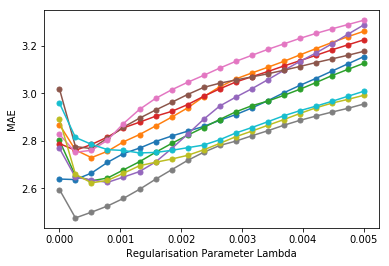

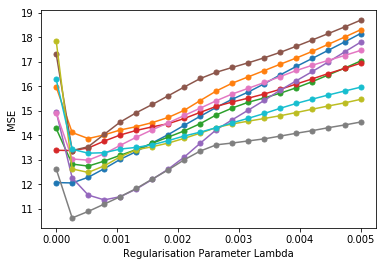

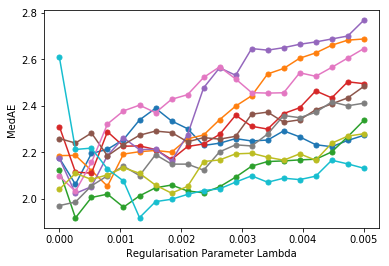

In [67]:
# Define empty figure objects
fig1, ax1 = plt.subplots() 
fig2, ax2 = plt.subplots() 
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()

# Define evaluation metric lists
r2Results = np.zeros((number_splits, len(lRegPara))) 
rmseResults = np.zeros((number_splits, len(lRegPara))) 
maeResults = np.zeros((number_splits, len(lRegPara))) 
mseResults = np.zeros((number_splits, len(lRegPara))) 
medaeResults = np.zeros((number_splits, len(lRegPara))) 

# Initialise the split iterator
nsplit = 0 

# Create a polynomial regression object
poly_model5 = PolynomialFeatures(degree=2, include_bias=True)

# Generate indices to split data into training and validation sets
for trainIndex, validIndex in kFold.split(X):
    
    # Print the indices
    #print("TRAIN:", trainIndex, "VALIDATE:", validIndex)
    # Print the k-fold iterator
    #print("k-fold: {0}". format(nsplit))
       
    # - Setup training and validation data splits
    # For each k-fold splits, gets the training and validation data for that split 
    trainX = np.array(X.loc[trainIndex]) 
    trainY = np.array(Y.loc[trainIndex]) 
    validX = np.array(X.loc[validIndex]) 
    validY = np.array(Y.loc[validIndex])
    
    # - Train Model
    # Fit the training data to the model
    polyFitTrainX = poly_model5.fit_transform(trainX) 
    # Fit the validation data to the model
    polyFitValidX = poly_model5.fit_transform(validX)
    
    # Iterate through each regularisation parameter 
    for j, regPara in enumerate(lRegPara):   
        
        # Print regularisation parameter iterator
        #print("reg index: {0}". format(j))
        # Print regularisation parameter
        #print("reg param: {0}". format(regPara))

        # - Create a lasso regression model object   
        # For each fold-parameter pairing, a regularised polynomial is trained
        # Lambda (alpha) is the regularisation parameter 
        # Normalise the data 
        # max_iterint -  increase value so that the lasso model converges
        polyLassoReg = linear_model.Lasso(alpha=regPara, normalize=True, random_state = 15, max_iter=1000) 
        
        # - Train Lasso Regression Model
        # Fit the training data (k-fold) to the model
        polyLassoReg.fit(polyFitTrainX, trainY) 
        
        # - Lasso Regression Model Prediction
        # Using the validation data (k-fold), 
        # predict the Y value for each input X value 
        predY = polyLassoReg.predict(polyFitValidX) 
       
        # - Lasso Regression Model Evaluation
        # R-squared (R2) (best score = 1.0)
        r2 = r2_score(validY, predY)    
        # Root Mean Square Error (RMSE)
        rmse = np.sqrt(mean_squared_error(validY, predY))
        # Mean Absolute Error (MAE)
        mae = mean_absolute_error(validY, predY)
        # Mean Squared Error (MSE)
        mse = mean_squared_error(validY, predY)
        # Median Absolute Error (MedAE) robust to outliers
        medae = median_absolute_error(validY, predY)
        # - Store the resulting model metrics to the results lists
        r2Results[nsplit, j] = r2   
        rmseResults[nsplit, j] = rmse
        maeResults[nsplit, j] = mae
        mseResults[nsplit, j] = mse
        medaeResults[nsplit, j] = medae
    
    # Update plot1
    ax1.plot(lRegPara, r2Results[nsplit, :], label='Fold '+ str(nsplit+1),
             marker='o', markersize=5) 
    
    # Update plot2
    ax2.plot(lRegPara, rmseResults[nsplit, :], label='Fold '+ str(nsplit+1),
             marker='o', markersize=5) 
    
    # Update plot3
    ax3.plot(lRegPara, maeResults[nsplit, :], label='Fold '+ str(nsplit+1),
             marker='o', markersize=5) 
    
    # Update plot4
    ax4.plot(lRegPara, mseResults[nsplit, :], label='Fold '+ str(nsplit+1),
             marker='o', markersize=5) 
    
    # Update plot5
    ax5.plot(lRegPara, medaeResults[nsplit, :], label='Fold '+ str(nsplit+1),
             marker='o', markersize=5) 
    
    # Increment the k-fold iterator 
    nsplit = nsplit + 1

# Update Plots
# Define plot labels and legend
# Plot 1 - R-Squared
ax1.set_xlabel("Regularisation Parameter Lambda") 
ax1.set_ylabel("R-Squared") 
ax1.set_title("k-Fold Cross Validation \n Polynomial Lasso Regression Models\n")
ax1.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1, title="k-Fold Cross Validation")

# Plot 2 - RMSE
ax2.set_xlabel("Regularisation Parameter Lambda") 
ax2.set_ylabel("RMSE") 

# PLot 3 - MAE
ax3.set_xlabel("Regularisation Parameter Lambda") 
ax3.set_ylabel("MAE") 

# PLot 4 - MSE
ax4.set_xlabel("Regularisation Parameter Lambda") 
ax4.set_ylabel("MSE") 

# Plot 5 - MedAE
ax5.set_xlabel("Regularisation Parameter Lambda") 
ax5.set_ylabel("MedAE") 

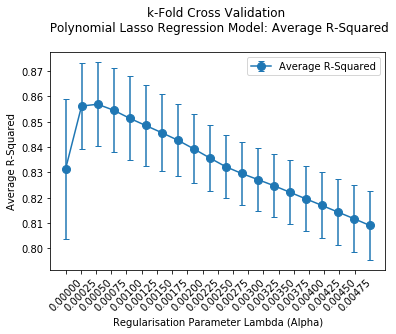

In [69]:
# Once all k-folds have been run

# - Create an new plot
# Define the plot
plt.figure() 
# Plot error bar: average and std dev of r2
plt.errorbar(x=lRegPara, y=np.mean(r2Results, axis=0),
             yerr=np.std(r2Results,axis=0), capsize=3, label='Average R-Squared',
             marker='o', markersize=8)
# Update x-axis
plt.xticks(np.arange(0, 0.005, step=0.00025), rotation=45)
# Update the labels
plt.xlabel("Regularisation Parameter Lambda (Alpha)") 
plt.ylabel("Average R-Squared")
plt.title("k-Fold Cross Validation \n Polynomial Lasso Regression Model: Average R-Squared\n")
plt.legend()
# save to a file
plt.savefig('a1_avg_r2_poly_lasso_regression.png')

In [70]:
# Average evalution metrics
print("Average Evaluation Metrics\n")
print("R-squared (R2):", np.mean(r2Results).round(4))
print("Root Mean Square Error (RMSE):", np.mean(rmseResults).round(4))
print('Mean Absolute Error (MAE):', np.mean(maeResults).round(4))
print('Mean Squared Error (MSE):', np.mean(mseResults).round(4))
print('Median Absolute Error (MedAE):', np.mean(medaeResults).round(4))

Average Evaluation Metrics

R-squared (R2): 0.8334
Root Mean Square Error (RMSE): 3.8434
Mean Absolute Error (MAE): 2.9114
Mean Squared Error (MSE): 14.8209
Median Absolute Error (MedAE): 2.2647


## Polynomial Lasso Regression (L1 Regularisation) using k-Fold Cross Validation (lambda=0.00025)<a id="Polynomial=Lasso-Regression-(L1-Regularisation)-using-k-Fold-Cross-Validation-(lambda=0.00025)"></a>

I ran the model again with lambda set to 0.00025 (best parameter).

In [71]:
# Define the number of splits
number_splits = 10 

# Initialise k-fold cross validation object (and shuffle the data beforehand)
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True, random_state=55)

In [72]:
# Setup best parameter 
lRegPara = [0.00025]

Text(0, 0.5, 'MedAE')

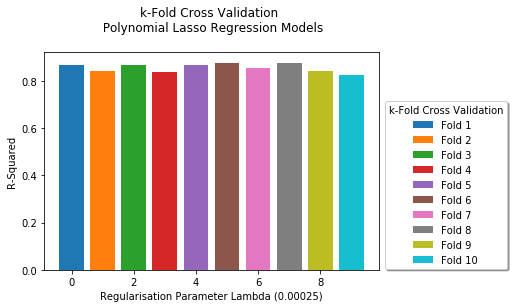

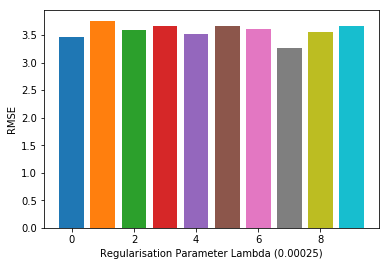

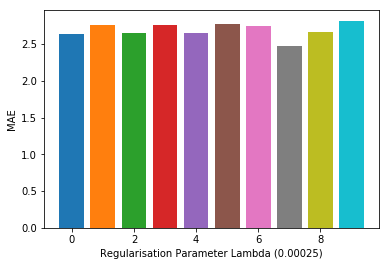

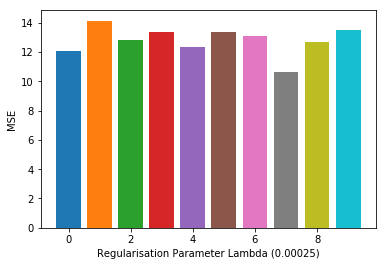

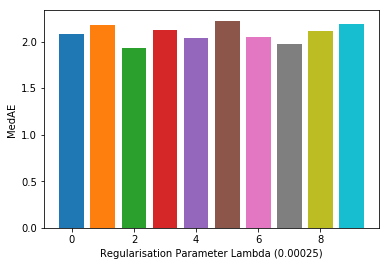

In [73]:
# Define empty figure objects
fig1, ax1 = plt.subplots() 
fig2, ax2 = plt.subplots() 
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()

# Define evaluation metric lists
r2Results = np.zeros((number_splits, len(lRegPara))) 
rmseResults = np.zeros((number_splits, len(lRegPara))) 
maeResults = np.zeros((number_splits, len(lRegPara))) 
mseResults = np.zeros((number_splits, len(lRegPara))) 
medaeResults = np.zeros((number_splits, len(lRegPara))) 

# Initialise the split iterator
nsplit = 0 

# Create a polynomial regression object
poly_model5 = PolynomialFeatures(degree=2, include_bias=True)

# Generate indices to split data into training and validation sets
for trainIndex, validIndex in kFold.split(X):
    
    # Print the indices
    #print("TRAIN:", trainIndex, "VALIDATE:", validIndex)
    # Print the k-fold iterator
    #print("k-fold: {0}". format(nsplit))
       
    # - Setup training and validation data splits
    # For each k-fold splits, gets the training and validation data for that split 
    trainX = np.array(X.loc[trainIndex]) 
    trainY = np.array(Y.loc[trainIndex]) 
    validX = np.array(X.loc[validIndex]) 
    validY = np.array(Y.loc[validIndex])
    
    # - Train Model
    # Fit the training data to the model
    polyFitTrainX = poly_model5.fit_transform(trainX) 
    # Fit the validation data to the model
    polyFitValidX = poly_model5.fit_transform(validX)
    
    # Iterate through each regularisation parameter 
    for j, regPara in enumerate(lRegPara):   
        
        # Print regularisation parameter iterator
        #print("reg index: {0}". format(j))
        # Print regularisation parameter
        #print("reg param: {0}". format(regPara))

        # - Create a lasso regression model object   
        # For each fold-parameter pairing, a regularised polynomial is trained
        # Lambda (alpha) is the regularisation parameter 
        # Normalise the data 
        # max_iterint -  increase value so that the lasso model converges
        polyLassoReg = linear_model.Lasso(alpha=regPara, normalize=True, random_state = 15, max_iter=1000) 
        
        # - Train Lasso Regression Model
        # Fit the training data (k-fold) to the model
        polyLassoReg.fit(polyFitTrainX, trainY) 
        
        # - Lasso Regression Model Prediction
        # Using the validation data (k-fold), 
        # predict the Y value for each input X value 
        predY = polyLassoReg.predict(polyFitValidX) 
       
        # - Lasso Regression Model Evaluation
        # R-squared (R2) (best score = 1.0)
        r2 = r2_score(validY, predY)    
        # Root Mean Square Error (RMSE)
        rmse = np.sqrt(mean_squared_error(validY, predY))
        # Mean Absolute Error (MAE)
        mae = mean_absolute_error(validY, predY)
        # Mean Squared Error (MSE)
        mse = mean_squared_error(validY, predY)
        # Median Absolute Error (MedAE) robust to outliers
        medae = median_absolute_error(validY, predY)
        # - Store the resulting model metrics to the results lists
        r2Results[nsplit, j] = r2   
        rmseResults[nsplit, j] = rmse
        maeResults[nsplit, j] = mae
        mseResults[nsplit, j] = mse
        medaeResults[nsplit, j] = medae
    
    # Update plot1
    ax1.bar(nsplit, r2Results[nsplit, :], label='Fold '+ str(nsplit+1))    
    # Update plot2
    ax2.bar(nsplit, rmseResults[nsplit, :], label='Fold '+ str(nsplit+1))
    # Update plot3
    ax3.bar(nsplit, maeResults[nsplit, :], label='Fold '+ str(nsplit+1))    
    # Update plot4
    ax4.bar(nsplit, mseResults[nsplit, :], label='Fold '+ str(nsplit+1))    
    # Update plot5
    ax5.bar(nsplit, medaeResults[nsplit, :], label='Fold '+ str(nsplit+1))
    
    # Increment the k-fold iterator 
    nsplit = nsplit + 1

# Update Plots
# Define plot labels and legend
# Plot 1 - R-Squared
ax1.set_xlabel("Regularisation Parameter Lambda (0.00025)") 
ax1.set_ylabel("R-Squared") 
ax1.set_title("k-Fold Cross Validation \n Polynomial Lasso Regression Models\n")
ax1.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1, title="k-Fold Cross Validation")

# Plot 2 - RMSE
ax2.set_xlabel("Regularisation Parameter Lambda (0.00025)") 
ax2.set_ylabel("RMSE") 

# PLot 3 - MAE
ax3.set_xlabel("Regularisation Parameter Lambda (0.00025)") 
ax3.set_ylabel("MAE") 

# PLot 4 - MSE
ax4.set_xlabel("Regularisation Parameter Lambda (0.00025)") 
ax4.set_ylabel("MSE") 

# Plot 5 - MedAE
ax5.set_xlabel("Regularisation Parameter Lambda (0.00025)") 
ax5.set_ylabel("MedAE") 

In [74]:
# Average evalution metrics
print("Average Evaluation Metrics\n")
print("R-squared (R2):", np.mean(r2Results).round(4))
print("Root Mean Square Error (RMSE):", np.mean(rmseResults).round(4))
print('Mean Absolute Error (MAE):', np.mean(maeResults).round(4))
print('Mean Squared Error (MSE):', np.mean(mseResults).round(4))
print('Median Absolute Error (MedAE):', np.mean(medaeResults).round(4))

Average Evaluation Metrics

R-squared (R2): 0.8559
Root Mean Square Error (RMSE): 3.5739
Mean Absolute Error (MAE): 2.6952
Mean Squared Error (MSE): 12.7904
Median Absolute Error (MedAE): 2.089


# Final Selected Approach<a id="Final-Selected-Approach"></a>

Based on all the findings and model results, I decided to use a 2nd degree polynomial lasso regression model with lambda=0.00025. I chose this approach to reduce the effect of outliers. Furthermore, I felt some feature selection, by reducing some coefficients to zero would improve my performance on the unseen data.

In [75]:
## - Ultimate Model

# - Setup training and validation data splits
# already done at start of project....
#trainX, validX, trainY, validY = train_test_split(np.array(X), np.array(Y), test_size=0.2, random_state = 55)

# Check record counts (number of rows and columns) for the training and validation data
print(trainX.shape) 
print(validX.shape) 
print(trainY.shape) 
print(validY.shape)

# Create a polynomial regression object
poly_model_final = PolynomialFeatures(degree=2, include_bias=True)

# - Train Model
# Fit the training data to the model
polyFitTrainX = poly_model_final.fit_transform(trainX)

# Fit the validation data to the model
polyFitValidX = poly_model_final.fit_transform(validX)

# - Create a lasso regression model object  
# Lamba (alpha) is the regularisation parameter
# Normalise the data 
# Solver - used in the computational routines (automatically)
polyLassoRegFinal = linear_model.Lasso(alpha=0.00025, normalize=True, random_state = 15) 
        
# Train Lasso Regression Model
polyLassoRegFinal.fit(polyFitTrainX, trainY) 
        
# - Lasso Regression Model Prediction
# predict the Y value for each input X value 
predYFinal = polyLassoRegFinal.predict(polyFitValidX) 
print(predYFinal.shape)

(1864, 22)
(207, 22)
(1864, 1)
(207, 1)
(207,)


### Final Model Evaluation

In [76]:
print("Evaluation Metrics\n")
# R-squared (R2) (best score = 1.0)
r2 = r2_score(validY, predYFinal)
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(validY, predYFinal))
# Mean Absolute Error (MAE)
mae = mean_absolute_error(validY, predYFinal)
# Mean Squared Error (MSE)
mse = mean_squared_error(validY, predYFinal)
# Median Absolute Error (MedAE) robust to outliers
medae = median_absolute_error(validY, predYFinal)

print("R-squared (R2):", r2.round(4))
print("Root Mean Square Error (RMSE):", rmse.round(4))
print('Mean Absolute Error (MAE):', mae.round(4))
print('Mean Squared Error (MSE):', mse.round(4))
print('Median Absolute Error (MedAE):', medae.round(4))

Evaluation Metrics

R-squared (R2): 0.8234
Root Mean Square Error (RMSE): 3.6696
Mean Absolute Error (MAE): 2.819
Mean Squared Error (MSE): 13.466
Median Absolute Error (MedAE): 2.1866


In [77]:
# - Check the difference between actual and predicted values 
# Create pandas dataframe from numpy arrays
# Residual = Observed Y – Predicted Y
# Standardized Residual = (Observed Y – Predicted Y) / √ Predicted Y
residuals_model_final = pd.DataFrame({'Actual': validY[:, 0], 
                   'Predicted': predYFinal, 
                   'Residual': validY[:, 0] - predYFinal, 
                   'Standardised Residual': (validY[:, 0] - predYFinal) / (np.sqrt(predYFinal))
                   })
# Check
residuals_model_final.head(5)

,Actual,Predicted,Residual,Standardised Residual
0,72.3,71.415812,0.884188,0.104628
1,66.7,68.951566,-2.251566,-0.271152
2,76.5,76.812305,-0.312305,-0.035634
3,55.4,59.450488,-4.050488,-0.525327
4,66.1,67.532235,-1.432235,-0.174284


### Residual Plots

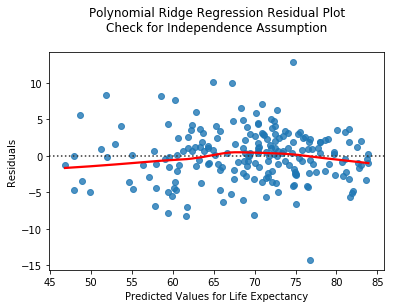

In [78]:
# Independence Assumption
# - Residuals on the vertical axis (Y)  
# - Predicted (Y) on the horizontal
ax = sns.residplot(residuals_model_final['Predicted'], residuals_model_final['Residual'], lowess=True,
                  line_kws={"color": "red"})
ax.set(xlabel='Predicted Values for Life Expectancy', ylabel='Residuals')
plt.title("Polynomial Ridge Regression Residual Plot\nCheck for Independence Assumption\n")
plt.show()

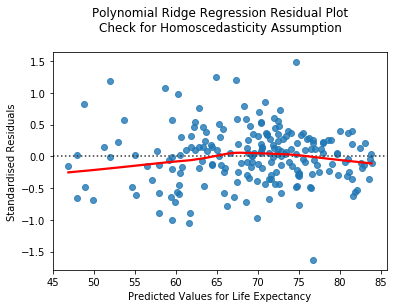

In [79]:
# Homoscedasticity Assumption
# - Standardised Residuals on the vertical axis (Y)  
# - Predicted (Y) on the horizontal
ax = sns.residplot(residuals_model_final['Predicted'], residuals_model_final['Standardised Residual'], lowess=True,
                  line_kws={"color": "red"})
ax.set(xlabel='Predicted Values for Life Expectancy', ylabel='Standardised Residuals')
plt.title("Polynomial Ridge Regression Residual Plot\nCheck for Homoscedasticity Assumption\n")
plt.show()

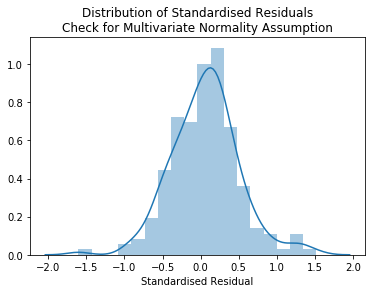

In [80]:
# Multivariate Normality Assumption 
# Histogram of the standardised residuals
sns.distplot(a=residuals_model_final['Standardised Residual'])
plt.title('Distribution of Standardised Residuals\nCheck for Multivariate Normality Assumption', size=12)
plt.show()

Text(0.5, 1.0, 'Normal Q-Q\nCheck for Multivariate Normality Assumption\n')

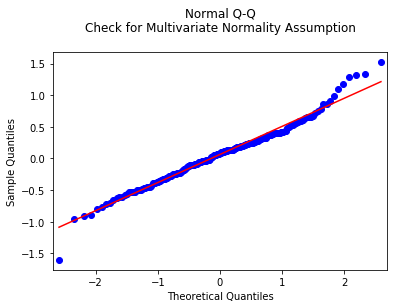

In [81]:
## QQ Plot of the standardised residuals
import statsmodels.api as sm 
sm.qqplot(residuals_model_final['Standardised Residual'], line ='s') 
plt.title("Normal Q-Q\nCheck for Multivariate Normality Assumption\n")

### Magnitude of model coefficients

In [82]:
# Store the model coefficients
coeff_df_final = pd.DataFrame(polyLassoRegFinal.coef_)
#print(coeff_df_final)

## Prediction on Unseen Data<a id="Prediction-on-Unseen-Data"></a>

Below is my final selected model (2nd degree polynomial lasso regression model with lambda=0.00025) run on the unseen test data.

In [83]:
# Creates a X variable from the data frame (all variables), and a Y variable for target
X = life_exp_train_scaled.drop('TARGET_LifeExpectancy', axis=1) 
Y = life_exp_train_scaled[['TARGET_LifeExpectancy']]

In [84]:
# Setup final training data (use all of it)
trainX = X
trainY = Y

# Setup test data for X
testX = life_exp_test_scaled
testX.head()

# Check record counts (number of rows and columns) for the training and validation data
print(trainX.shape) 
print(testX.shape) 
print(trainY.shape) 

(2071, 22)
(867, 22)
(2071, 1)


In [85]:
# Create a polynomial regression object
poly_model_final = PolynomialFeatures(degree=2, include_bias=True)

# - Train Model
# Fit the training data to the model
polyFitTrainX = poly_model_final.fit_transform(trainX)

# Fit the validation data to the model
polyFitTestX = poly_model_final.fit_transform(testX)

# - Create a lasso regression model object  
# Lamba (alpha) is the regularisation parameter
# Normalise the data 
# Solver - used in the computational routines (automatically)
polyLassoRegFinal = linear_model.Lasso(alpha=0.00025, normalize=True, random_state = 15) 
        
# Train Lasso Regression Model
polyLassoRegFinal.fit(polyFitTrainX, trainY) 
        
# - Lasso Regression Model Prediction
# predict the Y value for each input X value 
predYFinal = polyLassoRegFinal.predict(polyFitTestX) 

The predictions on the unseen data have been saved to a .csv file for assignment evaluation.

In [86]:
# Create a new data frame
prediction_submission = pd.DataFrame(predYFinal, columns = ['TARGET_LifeExpectancy']) 

# Check
prediction_submission.head()

# Reset index
prediction_submission = prediction_submission.reset_index(drop=False)
# Rename index column to ID
prediction_submission.rename(columns={'index': 'ID'}, inplace=True)
# Adjust the ID column value by 1
prediction_submission['ID'] += 1

# Check
prediction_submission.head()

,ID,TARGET_LifeExpectancy
0,1,57.609182
1,2,79.727221
2,3,45.342905
3,4,51.640628
4,5,61.540488


In [87]:
# Save results to csv
prediction_submission.to_csv('prediction.csv', index=False)

# References<a id="References"></a>

[1] R. Tennakoon, Class Assignment, Topic: “Assignment 1: Introduction to Machine Learning”, COSC2793, School  of Science, RMIT University, Melbourne, Mar., 13, 2020. [Online]. Available: https://rmit.instructure.com/courses/67399/assignments/417316. [Accessed: Apr. 3, 2020]. 

[2] J. Kelleher, B. Mac Namee, and A. D’Arcy, *Fundamentals of Machine Learning for Predictive Data Analytics*, 1st ed. Massachusetts: The MIT Press, 2015.

[3] V. Aksakalli, Class Lecture, Topic: “Week 3: Data Preprocessing for ML”, MATH2319, School of Science, RMIT University, Melbourne, Mar., 19, 2020. [Online]. Available: https://rmit.instructure.com/courses/67061/files/10901660?module_item_id=2240219. [Accessed: Apr. 3, 2020]. 

[4] R. Tennakoon, Class Lecture, Topic: “Week 4a: Evaluating Hypothesis”, COSC2793, School of Science, RMIT University, Melbourne, Mar., 26, 2020. [Online]. Available: https://rmit.instructure.com/courses/67399/files/11385446/. [Accessed: Apr. 3, 2020].

[5] W. Koehrsen, "Visualizing Data with Pairs Plots in Python", *towardsdatascience.com*, 2018. [Online]. Available: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166. [Accessed: Apr. 3, 2020].

[6]  M Waskom, "Seaborn", *seaborn.pydata.org*, 2020. [Online]. Available: https://seaborn.pydata.org/generated/seaborn.pairplot.html. [Accessed: Apr. 3, 2020].

[7] “Assumptions of Multiple Linear Regression”, Statistics Solutions, 2020. [Online]. Available: https://www.statisticssolutions.com/assumptions-of-multiple-linear-regression/. [Accessed: Apr. 3, 2020].

[8] R. Tennakoon, Class Lecture, Topic: “Week 2: Regression”, COSC2793, School of Science, RMIT University, Melbourne, Mar., 12, 2020. [Online]. Available: https://rmit.instructure.com/courses/67399/files/11257892/. [Accessed: Apr. 3, 2020]. 

[9] “Compare the effect of different scalers on data with outliers”, *scikit-learn.org*, 2019. [Online]. Available: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html. [Accessed: Apr. 3, 2020]. 

[10] "Metrics and scoring: quantifying the quality of predictions", *scikit-learn.org*, 2019. [Online]. Available: https://scikit-learn.org/stable/modules/model_evaluation.html. [Accessed: Apr. 3, 2020]. 

[11] "MAE and RMSE - Which Metric is Better?", *medium.com*, 2016. [Online]. Available: https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d. [Accessed: Apr. 3, 2020].

[12] T. Sarkar, "How do you check the quality of your regression model in Python?", *towardsdatascience.com*, 2019. [Online]. Available: https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685. [Accessed: Apr. 3, 2020].

[13] S. Glen, "Standardized Residuals in Statistics: What are They?", *statisticshowto.com*, 2020. [Online]. Available: https://www.statisticshowto.com/what-is-a-standardized-residuals/. [Accessed: Apr. 3, 2020].

[14] J. Brownlee, “A Gentle Introduction to k-fold Cross-Validation”, machinelearningmastery, 2019. [Online]. Available: https://machinelearningmastery.com/k-fold-cross-validation/. [Accessed: Apr. 3, 2020].